<a href="https://colab.research.google.com/github/mermovich/analytics/blob/main/cohorts_analysis_of_advertising_channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ каналов привлечение пользователей 

### Описание 

Есть датасет c набором агрегированных данных по когортам пользователей, где представлена следующая информация: 
- REPORT_DATE - отчетная дата, 
- OPEN_MONTH - месяц прихода клиента в банк, 
- ACQUISITION CHANNEL - канал привлечения, 
- STATUS - статус клиента на отчетный месяц (активен или нет), 
- CNT - количество клиентов, 
- MAU_Product1-8 - количество активных продуктов 1-8.

### Задача 

1. Клиенты с какого канала дольше остаются активными? 
2. Какие продуктые дольше остаются активными у клиентов?  

 ### 1. Предобработка данных

In [1]:
! gdown --id 1FXo1hOGrX18Yt7soAN_yvcZFxwOPfRTm 

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FXo1hOGrX18Yt7soAN_yvcZFxwOPfRTm
To: /content/raif_cohorts_sample.xlsx
100% 167k/167k [00:00<00:00, 89.7MB/s]


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:10,.2f}'.format)
pd.set_option('display.max_colwidth', None) 

In [4]:
df = pd.read_excel('/content/raif_cohorts_sample.xlsx')

In [5]:
df.head()

REPORT_DATE OPEN_MONTH ACQUISITION CHANNEL      STATUS        CNT  MAU_Product_1  MAU_Product_2  MAU_Product_3  MAU_Product_4  MAU_Product_5  MAU_Product_6  MAU_Product_7  MAU_Product_8
0  2019-01-31 2019-01-31           channel_1      active   4,813.33         272.00         118.00         286.35         842.23         112.00           3.47       3,135.60       4,475.20
1  2019-01-31 2019-01-31           channel_1  not_active   2,290.67           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00
2  2019-01-31 2019-01-31           channel_2      active  10,253.33       1,098.67         489.31          11.01         897.97           8.00          20.80       8,540.13      11,403.20
3  2019-01-31 2019-01-31           channel_2  not_active  10,125.33           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00
4  2019-01-31 2019-01-31           channel_3      active   6,562.67          34.67          42.48          20.45         322.43          13.33           3.47       3,170.27       5,990.40

In [6]:
df.columns

Index(['REPORT_DATE', 'OPEN_MONTH', 'ACQUISITION CHANNEL', 'STATUS', 'CNT', 'MAU_Product_1', 'MAU_Product_2', 'MAU_Product_3', 'MAU_Product_4', 'MAU_Product_5', 'MAU_Product_6', 'MAU_Product_7', 'MAU_Product_8'], dtype='object')

In [7]:
df.columns = ['date', 'month_open', 'channel', 'status', 'cnt', 
              'mau_product_1', 'mau_product_2', 'mau_product_3', 'mau_product_4', 
              'mau_product_5', 'mau_product_6', 'mau_product_7', 'mau_product_8']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2904 non-null   datetime64[ns]
 1   month_open     2904 non-null   datetime64[ns]
 2   channel        2904 non-null   object        
 3   status         2904 non-null   object        
 4   cnt            2904 non-null   float64       
 5   mau_product_1  2904 non-null   float64       
 6   mau_product_2  2904 non-null   float64       
 7   mau_product_3  2904 non-null   float64       
 8   mau_product_4  2904 non-null   float64       
 9   mau_product_5  2904 non-null   float64       
 10  mau_product_6  2904 non-null   float64       
 11  mau_product_7  2904 non-null   float64       
 12  mau_product_8  2904 non-null   float64       
dtypes: datetime64[ns](2), float64(9), object(2)
memory usage: 295.1+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

date             0
month_open       0
channel          0
status           0
cnt              0
mau_product_1    0
mau_product_2    0
mau_product_3    0
mau_product_4    0
mau_product_5    0
mau_product_6    0
mau_product_7    0
mau_product_8    0
dtype: int64

In [11]:
df.head()

date month_open    channel      status        cnt  mau_product_1  mau_product_2  mau_product_3  mau_product_4  mau_product_5  mau_product_6  mau_product_7  mau_product_8
0 2019-01-31 2019-01-31  channel_1      active   4,813.33         272.00         118.00         286.35         842.23         112.00           3.47       3,135.60       4,475.20
1 2019-01-31 2019-01-31  channel_1  not_active   2,290.67           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00
2 2019-01-31 2019-01-31  channel_2      active  10,253.33       1,098.67         489.31          11.01         897.97           8.00          20.80       8,540.13      11,403.20
3 2019-01-31 2019-01-31  channel_2  not_active  10,125.33           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00
4 2019-01-31 2019-01-31  channel_3      active   6,562.67          34.67          42.48          20.45         322.43          13.33           3.47       3,170.27       5,990.40

In [12]:
cnt_sum = df.groupby(['date', 'month_open', 'channel'])['cnt'].sum().reset_index()
df = df.merge(cnt_sum, on=['date', 'month_open', 'channel'], how='left').rename(columns={'cnt_x':'cnt', 'cnt_y':'cnt_sum'}) 

In [13]:
df.head()

date month_open    channel      status        cnt  mau_product_1  mau_product_2  mau_product_3  mau_product_4  mau_product_5  mau_product_6  mau_product_7  mau_product_8    cnt_sum
0 2019-01-31 2019-01-31  channel_1      active   4,813.33         272.00         118.00         286.35         842.23         112.00           3.47       3,135.60       4,475.20   7,104.00
1 2019-01-31 2019-01-31  channel_1  not_active   2,290.67           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00   7,104.00
2 2019-01-31 2019-01-31  channel_2      active  10,253.33       1,098.67         489.31          11.01         897.97           8.00          20.80       8,540.13      11,403.20  20,378.67
3 2019-01-31 2019-01-31  channel_2  not_active  10,125.33           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00  20,378.67
4 2019-01-31 2019-01-31  channel_3      active   6,562.67          34.67          42.48          20.45         322.43          13.33           3.47       3,170.27       5,990.40  14,241.33

In [14]:
for column in df.drop(['date', 'month_open', 'channel', 'status', 'cnt_sum'], axis=True):
  df['pct_' + column] = df[column] / df['cnt_sum']

## 2. Исследовательский анализ 

### 2.1 Активные клиенты

Проанализируем как каналы трафика влияют на статус клиента

In [15]:
users = df.query('status == "active" ')[['date', 'month_open', 'channel', 'status', 'cnt', 'cnt_sum', 'pct_cnt']].copy()
users['month']      = users['date'].astype('datetime64[1M]')  
users['month_open'] = users['month_open'].astype('datetime64[1M]') 
users = users.drop('date', axis=True)
users['lifetime']   = ((users['month'] - users['month_open']) / np.timedelta64(1,'M')).round().astype(int) 

In [16]:
def status(channel):  
  t = (users[users['channel']== channel].groupby(['status', 'month_open', 'lifetime'])['pct_cnt'].sum()
                                                                    .reset_index()
                                                                    .sort_values(['month_open', 'lifetime']).reset_index().drop('index', axis=True))  
  t['month_open'] = t['month_open'].dt.strftime('%Y-%m-%d')
  plt.figure(figsize=(15,4), dpi= 80)
  plt.grid()
  sns.lineplot(x="lifetime", y='pct_cnt', data=t, hue='status') 
  t = t.pivot_table(index='month_open', columns='lifetime', values='pct_cnt', aggfunc='sum') 
  plt.figure(figsize=(15, 8)) 
  plt.title(channel) 
  sns.heatmap(t, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='RdBu', linewidth=.5, annot_kws={"fontsize":8}) 

- ### Канал 1

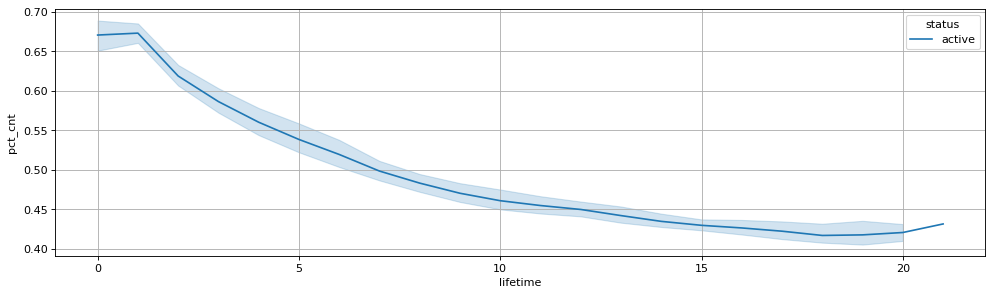

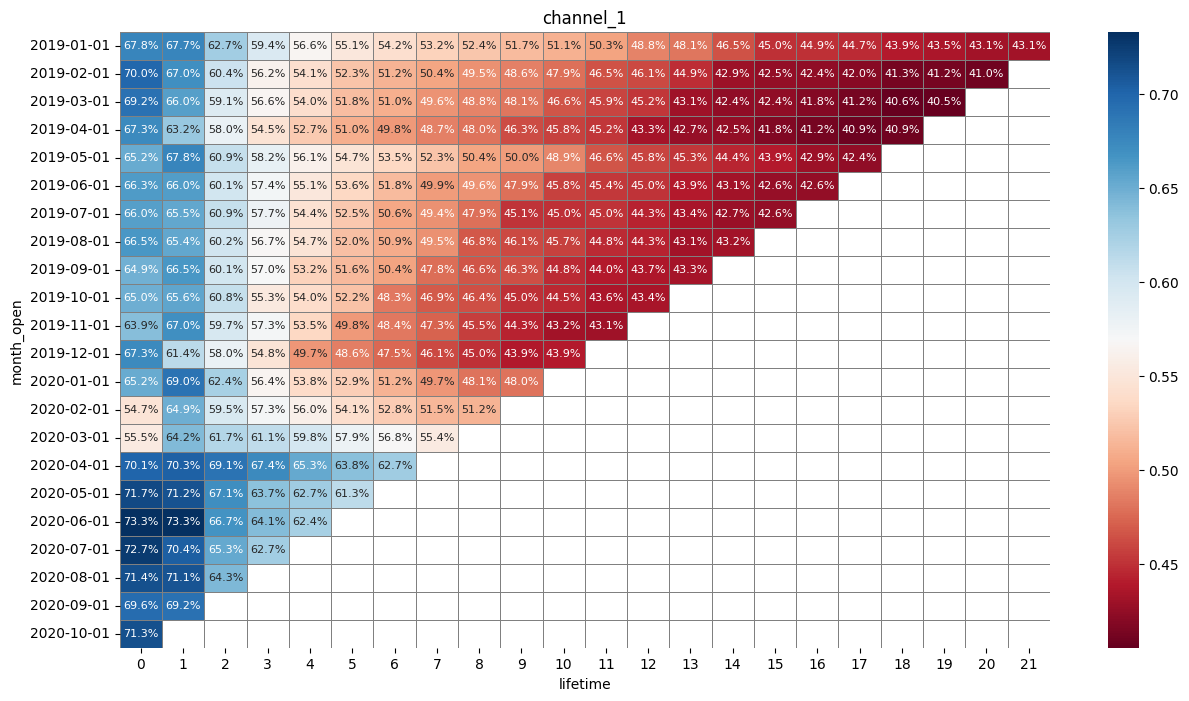

In [17]:
status('channel_1')

- ### Канал 2

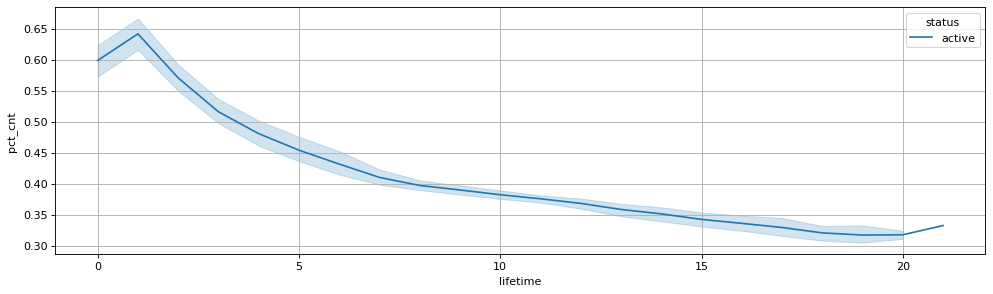

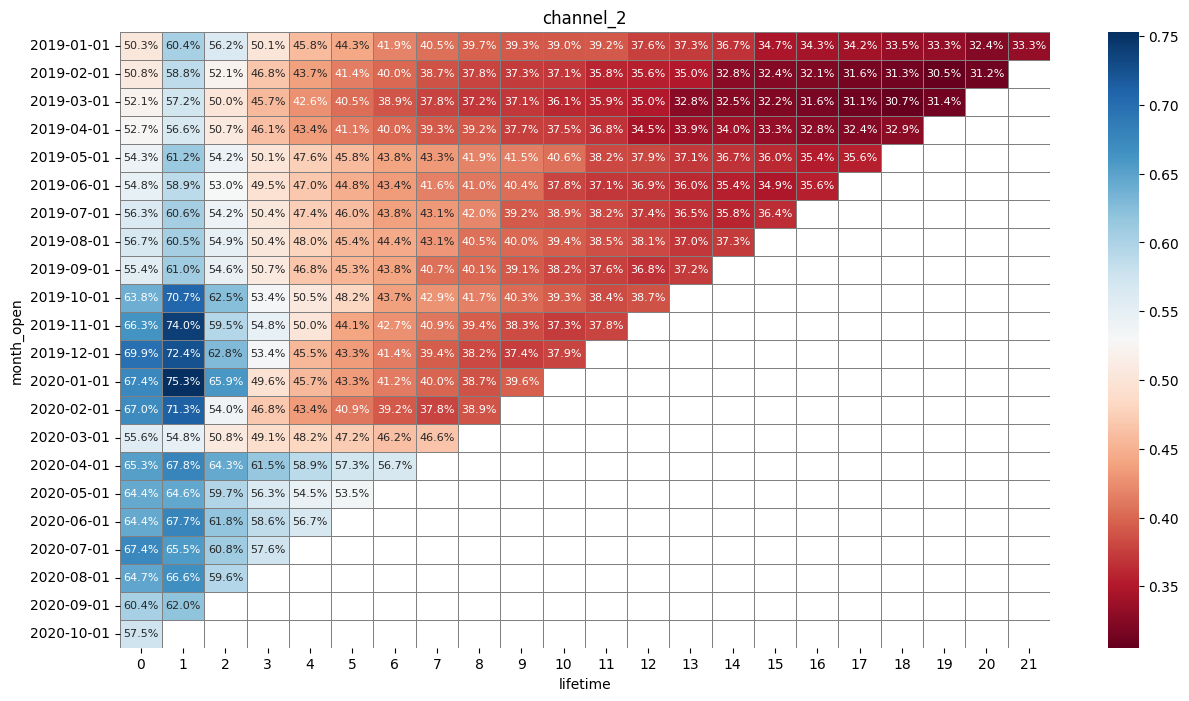

In [18]:
status('channel_2')

- ### Канал 3

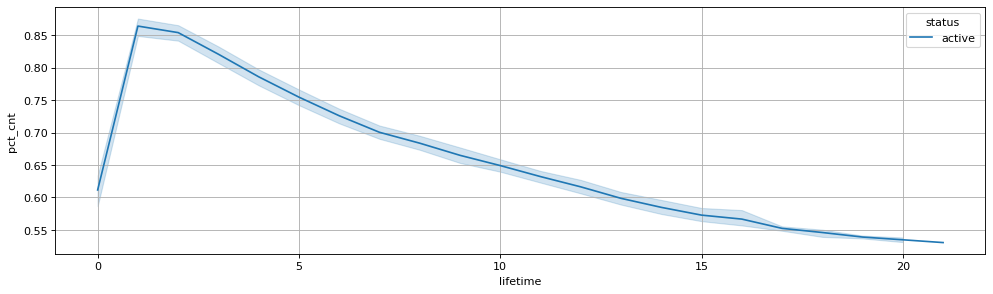

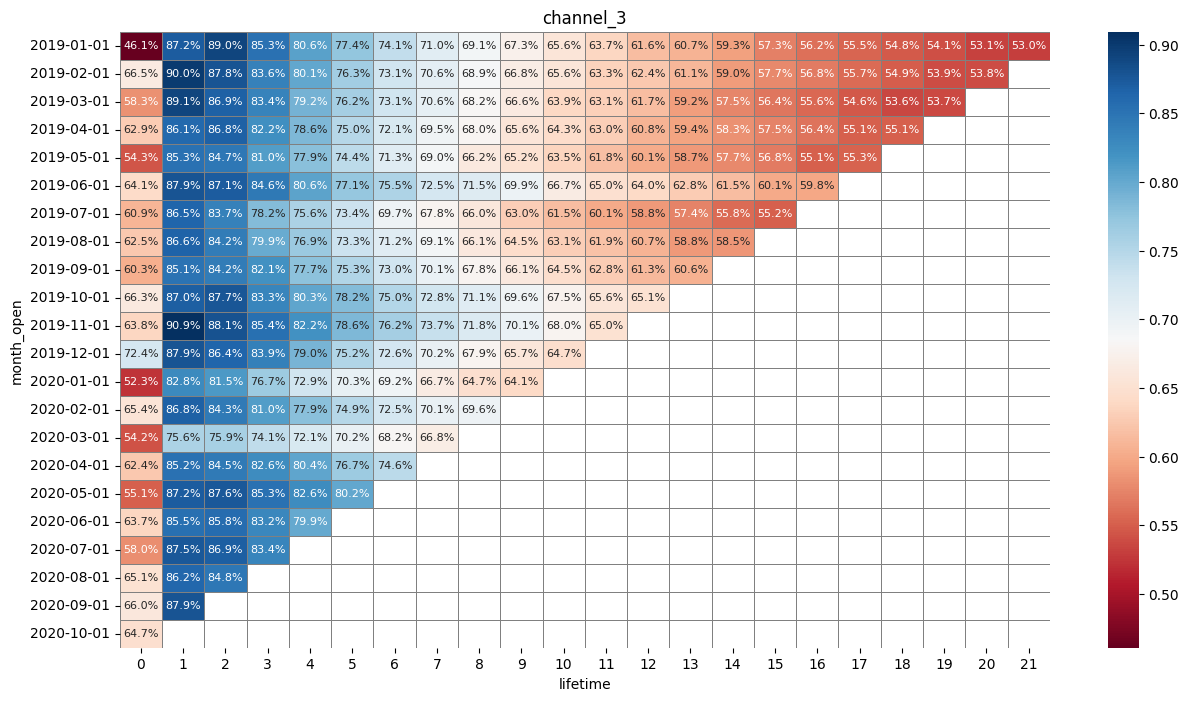

In [19]:
status('channel_3')

### *Вывод* 

- 1 канал - работают хуже, процент активных клиентов на 20 месяц опустился до 40%
- 2 канал - работает хуже, процент активных клиентов на 20 месяц опустился до 30% (более чем в 2 раза)
- 3 канал - самый  эффективный канал, процент активныз клиентов не опустился ниже 55%

Возможно есть какие-то другие проблемы с продуктом, что независимо от даты активации и канала привлечения, доля активных пользователей снижается. 


Далее посмотрим влияние на продукты.

## 2.2 Активные продукты

In [20]:
df.head()

date month_open    channel      status        cnt  mau_product_1  mau_product_2  mau_product_3  mau_product_4  mau_product_5  mau_product_6  mau_product_7  mau_product_8    cnt_sum    pct_cnt  pct_mau_product_1  pct_mau_product_2  pct_mau_product_3  pct_mau_product_4  pct_mau_product_5  pct_mau_product_6  pct_mau_product_7  pct_mau_product_8
0 2019-01-31 2019-01-31  channel_1      active   4,813.33         272.00         118.00         286.35         842.23         112.00           3.47       3,135.60       4,475.20   7,104.00       0.68               0.04               0.02               0.04               0.12               0.02               0.00               0.44               0.63
1 2019-01-31 2019-01-31  channel_1  not_active   2,290.67           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00   7,104.00       0.32               0.00               0.00               0.00               0.00               0.00               0.00               0.00               0.00
2 2019-01-31 2019-01-31  channel_2      active  10,253.33       1,098.67         489.31          11.01         897.97           8.00          20.80       8,540.13      11,403.20  20,378.67       0.50               0.05               0.02               0.00               0.04               0.00               0.00               0.42               0.56
3 2019-01-31 2019-01-31  channel_2  not_active  10,125.33           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00  20,378.67       0.50               0.00               0.00               0.00               0.00               0.00               0.00               0.00               0.00
4 2019-01-31 2019-01-31  channel_3      active   6,562.67          34.67          42.48          20.45         322.43          13.33           3.47       3,170.27       5,990.40  14,241.33       0.46               0.00               0.00               0.00               0.02               0.00               0.00               0.22               0.42

In [21]:
mau = df[['date', 'month_open', 'channel', 'pct_mau_product_1', 'pct_mau_product_2', 'pct_mau_product_3', 'pct_mau_product_4',  
                                           'pct_mau_product_5', 'pct_mau_product_6', 'pct_mau_product_7', 'pct_mau_product_8']].copy()
mau['month']      =   mau['date'].astype('datetime64[1M]')  
mau['month_open'] =   mau['month_open'].astype('datetime64[1M]') 
mau = mau.drop('date', axis=True)
mau = mau.groupby(['month', 'month_open', 'channel'])['pct_mau_product_1', 'pct_mau_product_2', 'pct_mau_product_3', 'pct_mau_product_4',  
                                                      'pct_mau_product_5', 'pct_mau_product_6', 'pct_mau_product_7', 'pct_mau_product_8'].sum().reset_index()
mau['lifetime']   = ((mau['month'] - mau['month_open']) / np.timedelta64(1,'M')).round().astype(int) 

In [22]:
def product_mau(channel):  
  for product in mau.drop(['month', 'month_open', 'channel', 'lifetime'], axis=True):
    mau_channel = (mau[mau['channel']== channel].groupby(['month_open', 'lifetime'])[product].sum()
                                                .reset_index()
                                                .sort_values(['month_open', 'lifetime']).reset_index().drop('index', axis=True))
    mau_channel['month_open'] = mau_channel['month_open'].dt.strftime('%Y-%m-%d') 
    plt.figure(figsize=(15,4), dpi= 80)
    plt.grid()
    plt.title(product) 
    sns.lineplot(x="lifetime", y=product, data=mau_channel)  
    mau_channel_pivot = mau_channel.pivot_table(index='month_open', columns='lifetime', values=product, aggfunc='sum') 
    plt.figure(figsize=(15, 8)) 
    sns.heatmap(mau_channel_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='RdBu', linewidth=.5, annot_kws={"fontsize":8}) 

- ### Канал 1

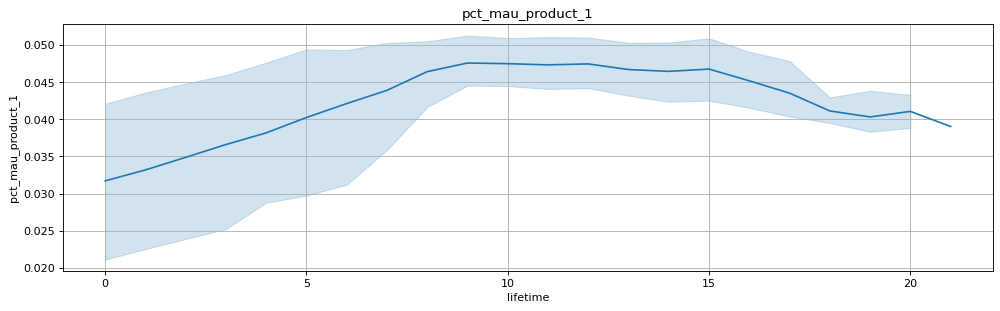

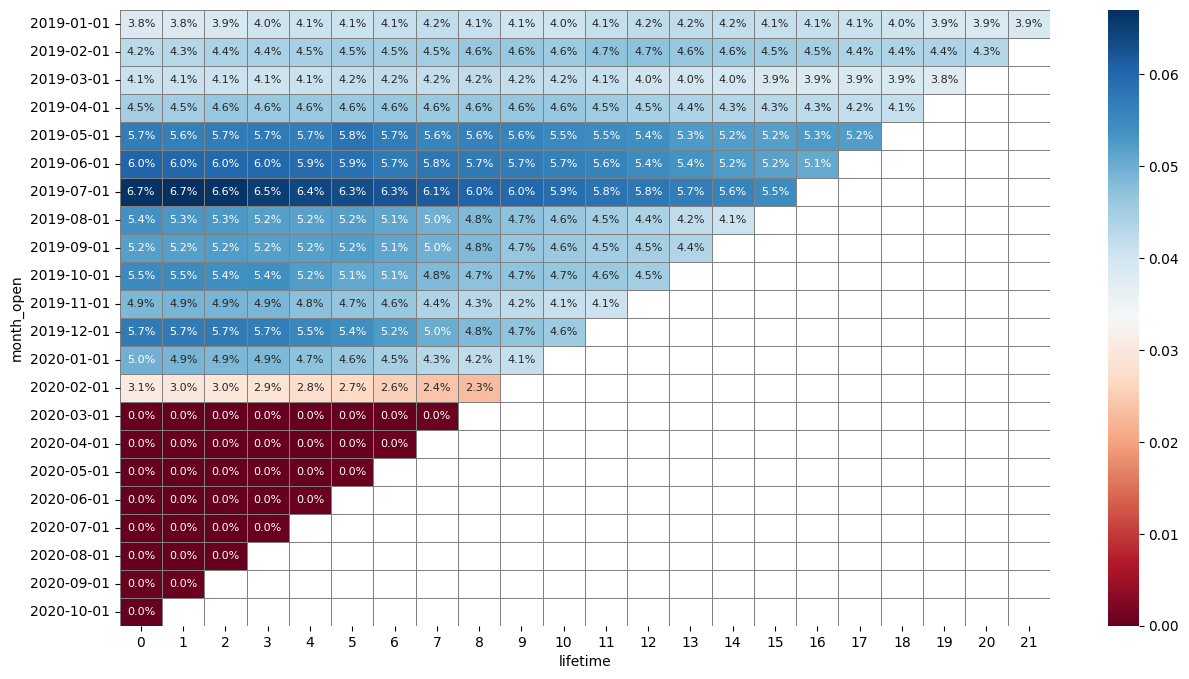

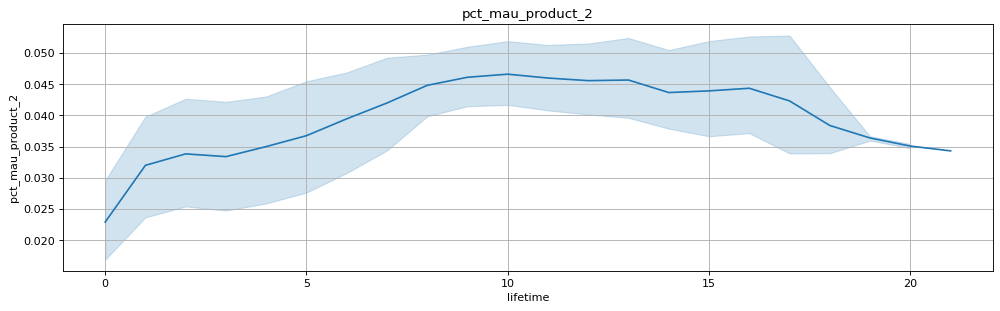

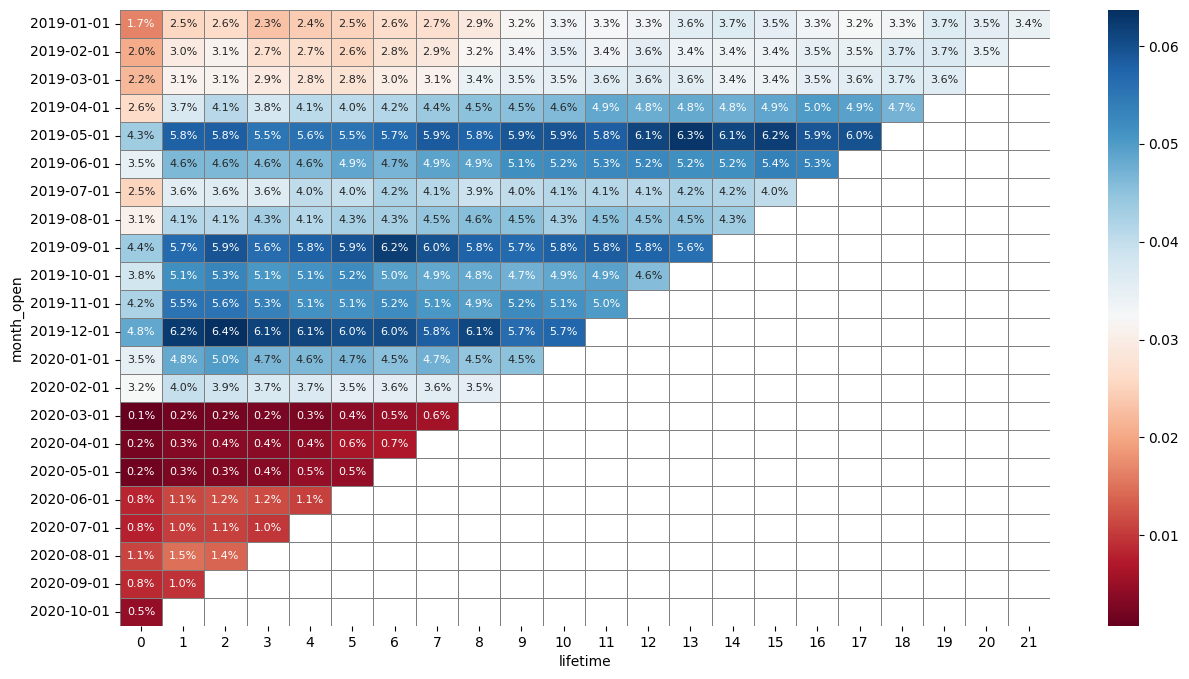

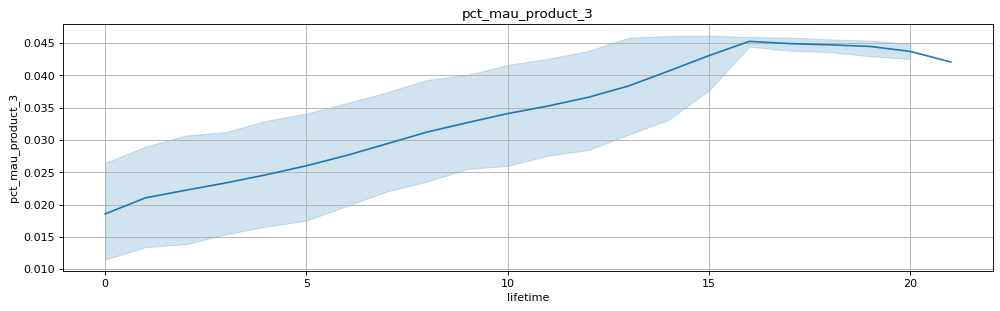

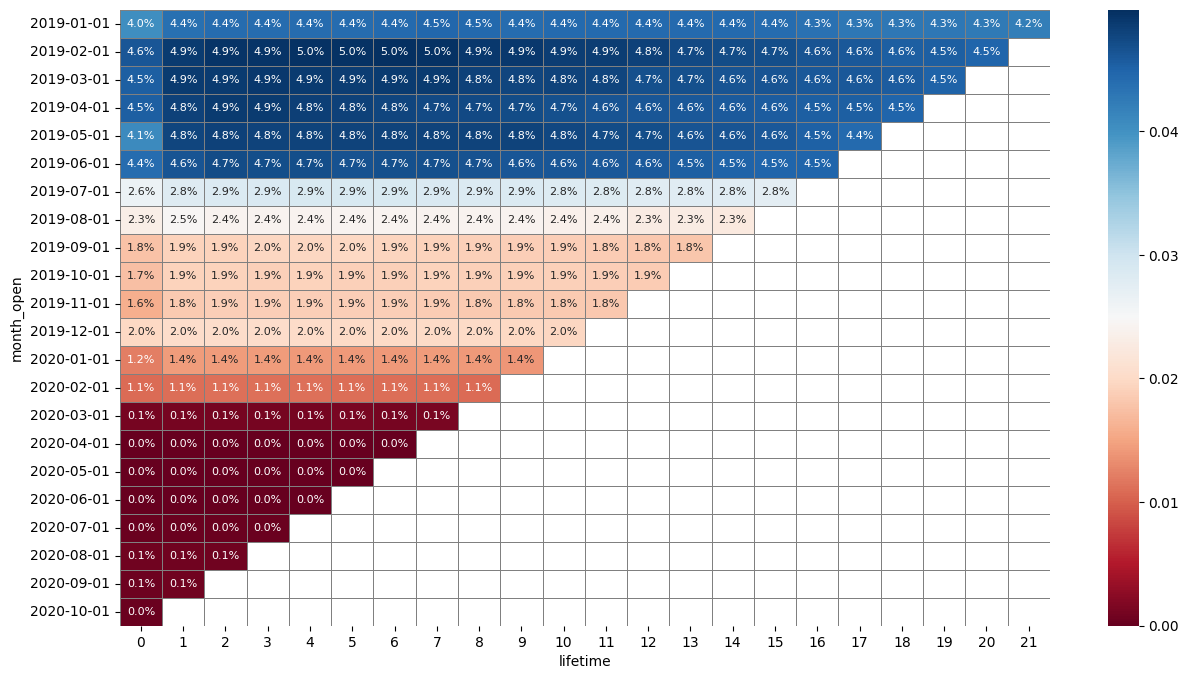

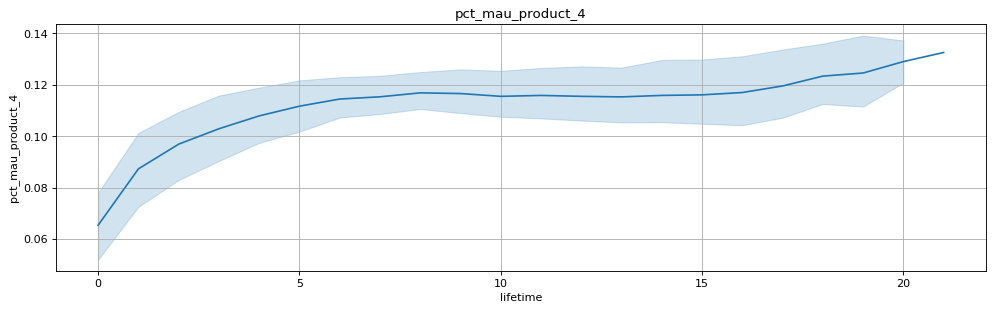

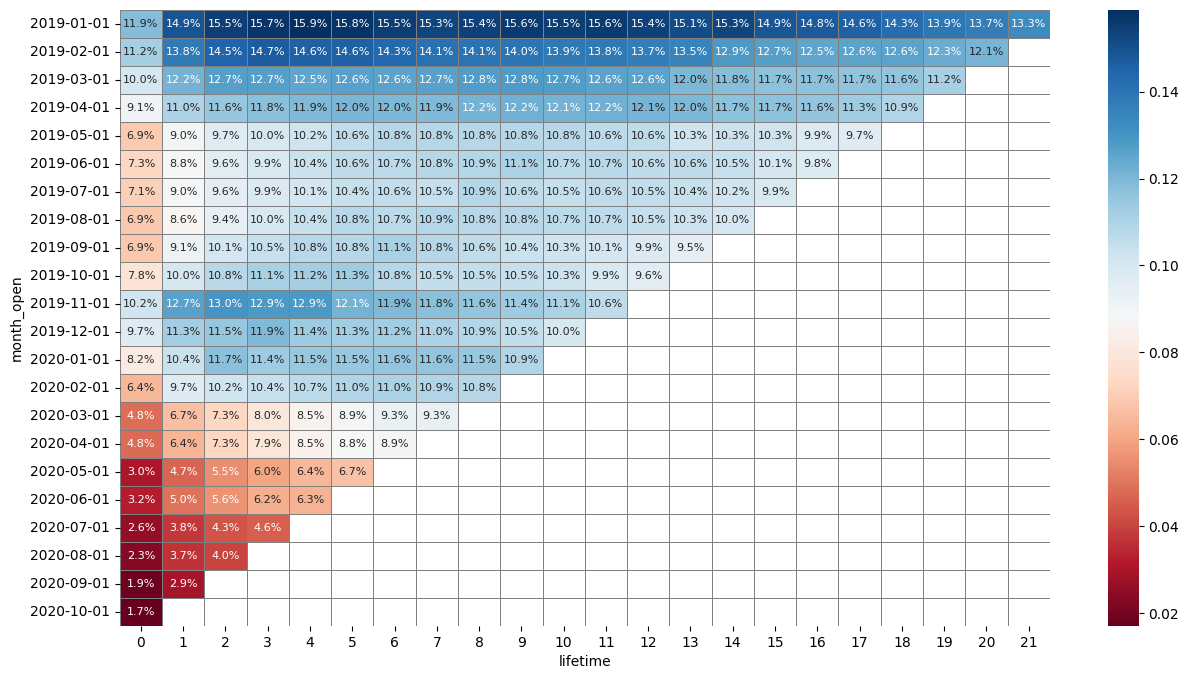

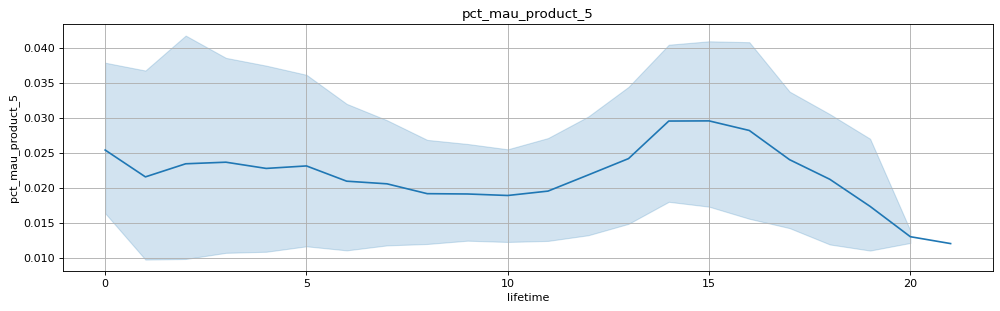

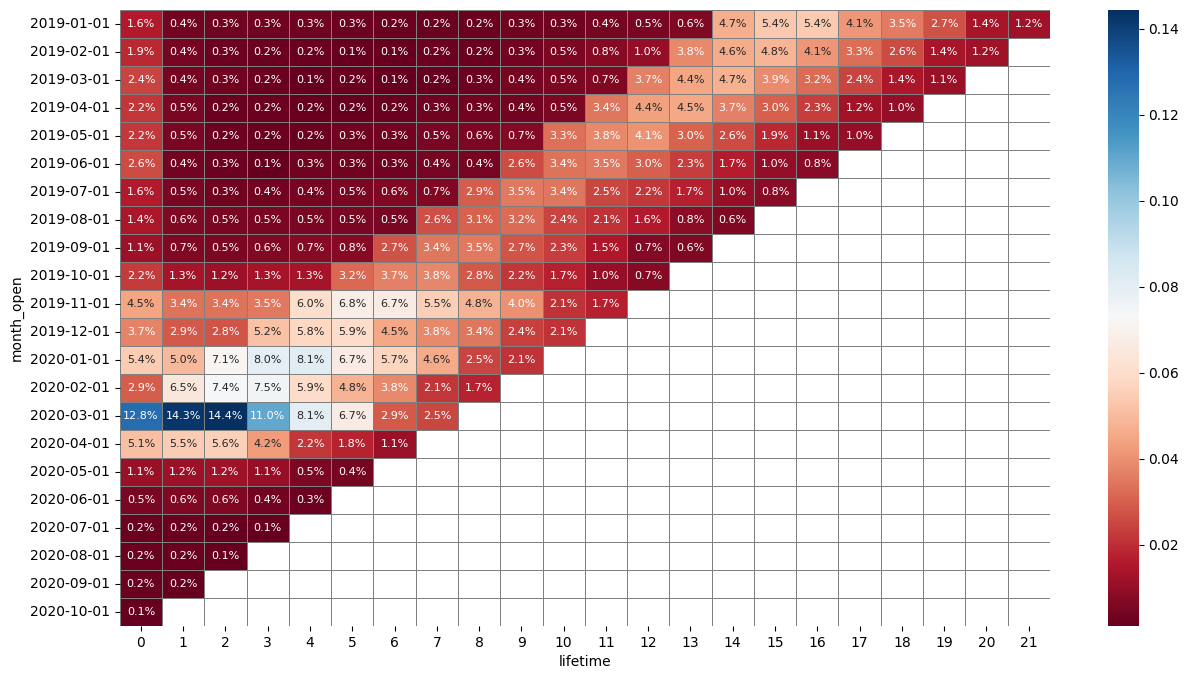

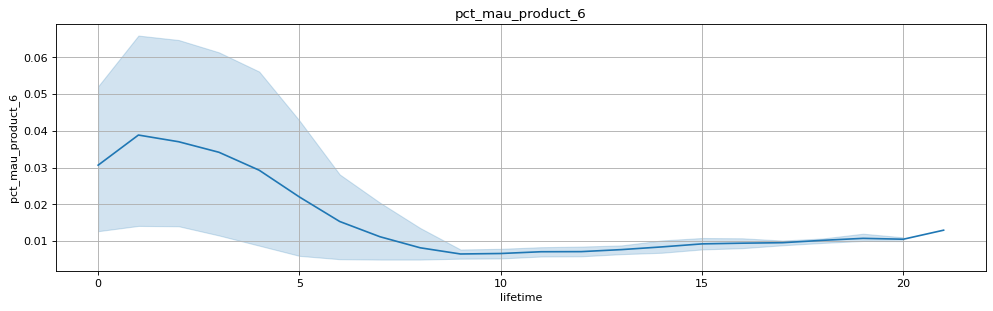

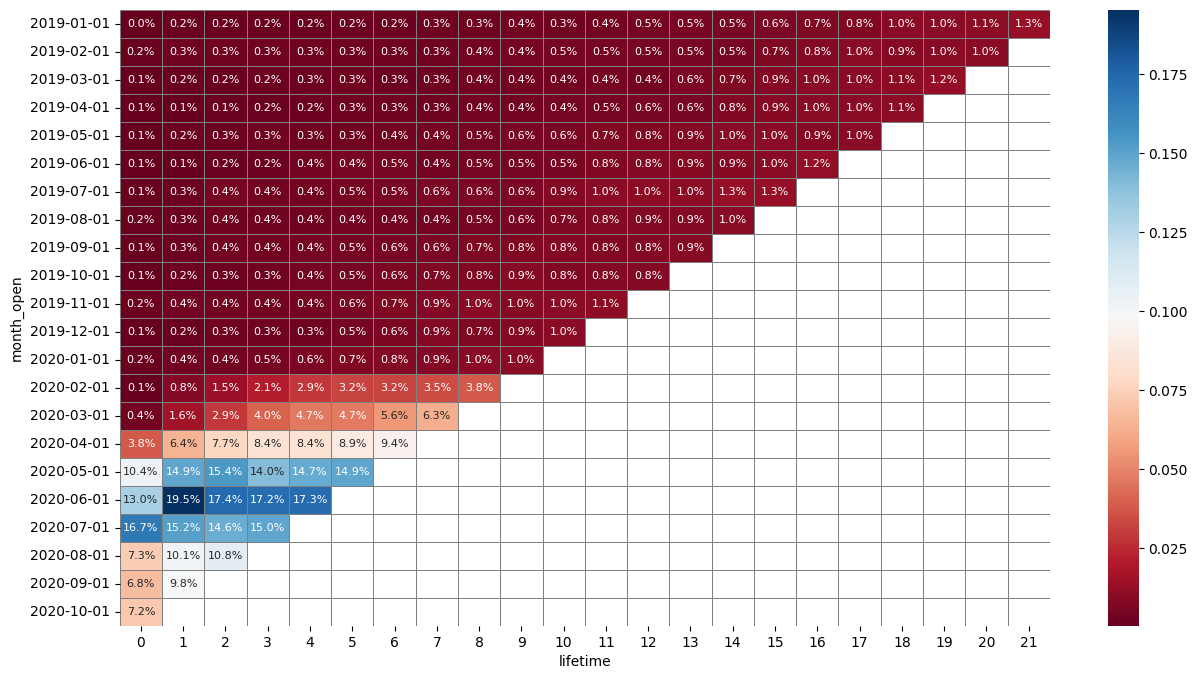

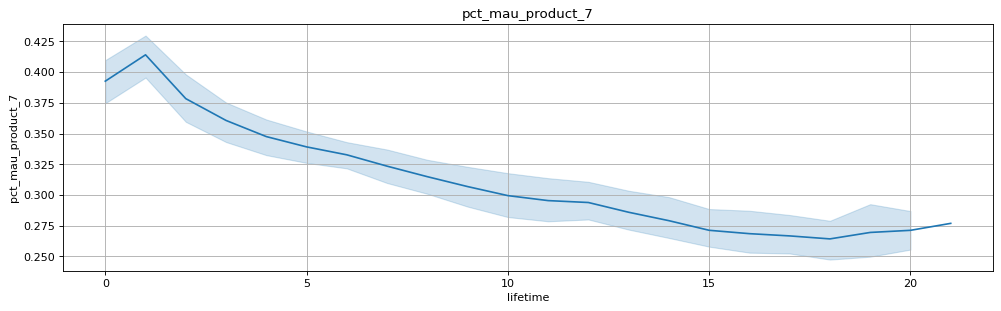

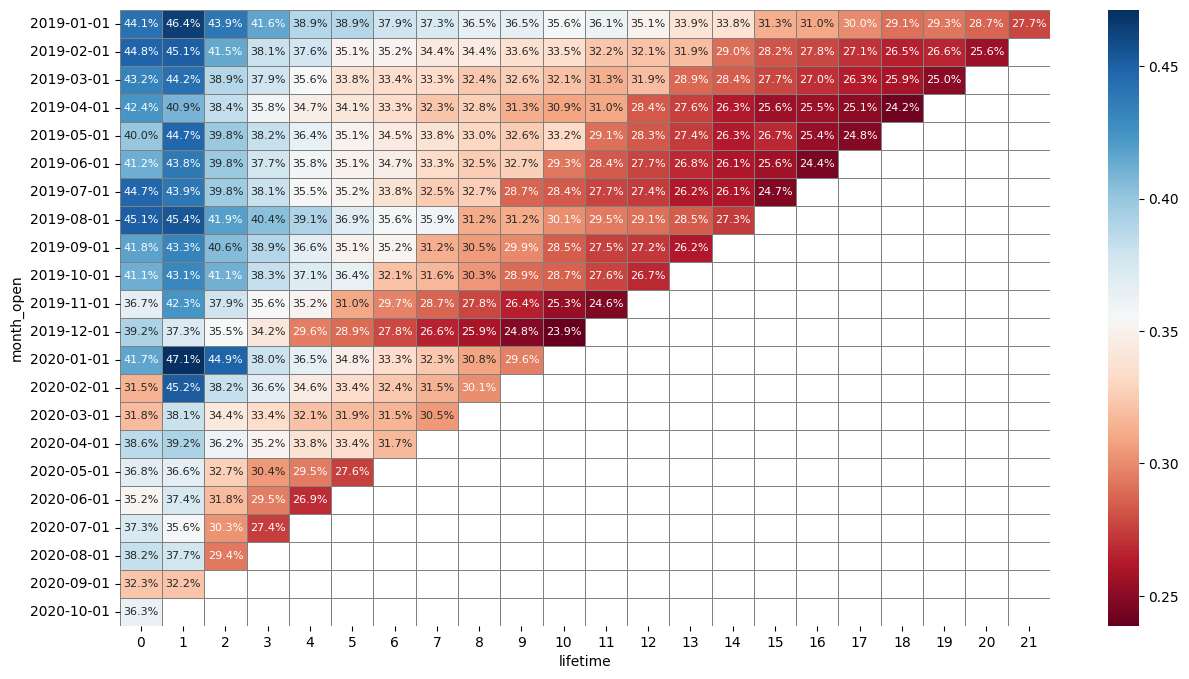

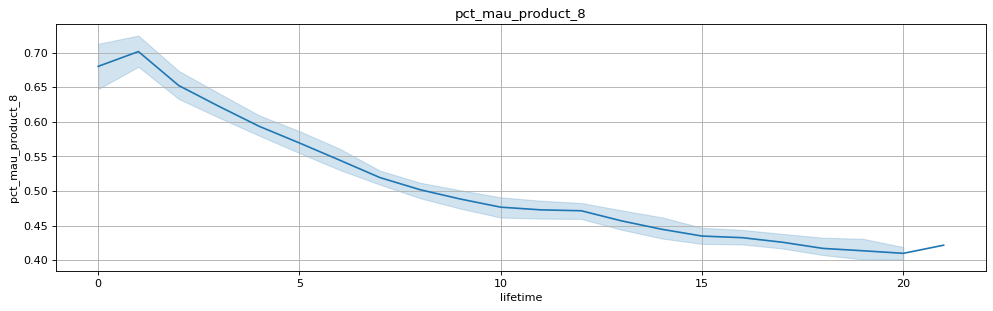

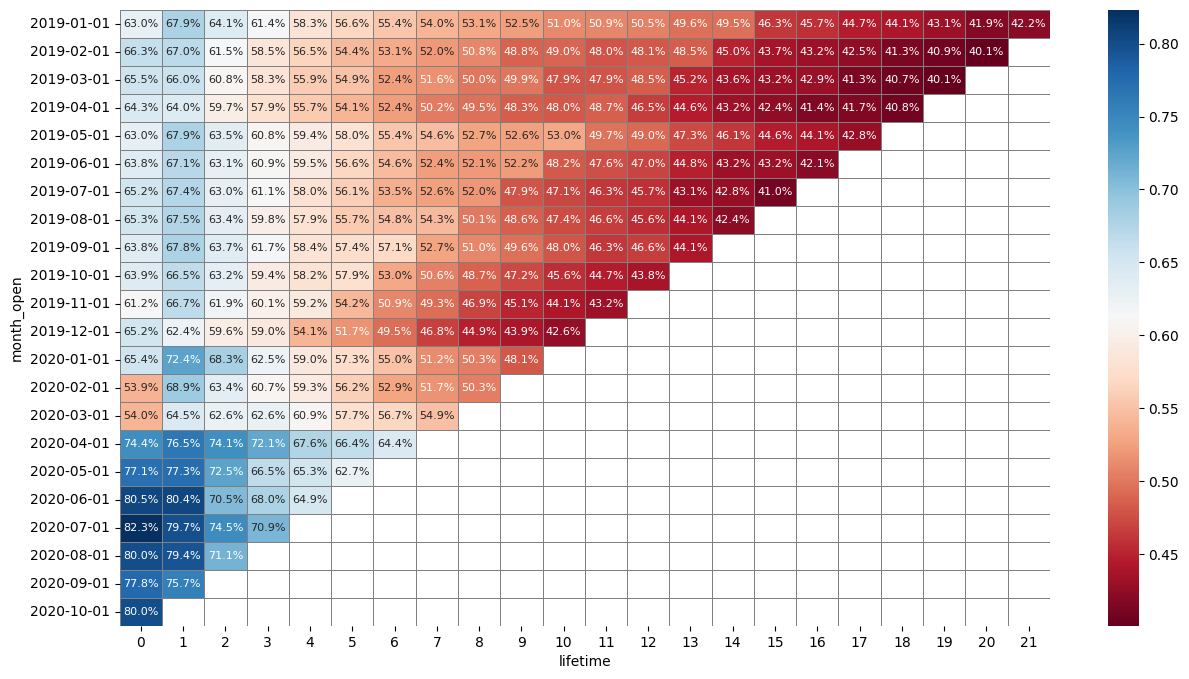

In [23]:
product_mau('channel_1')

### Процент активныз продуктов у пользователей с Канала 1 

- Продукт 1 - наблюдается рост в среднем с 3% до 4%
- Продукт 2 - наблюдается рост в среднем с 2% до 4%
- Продукт 3 - наблюдается рост в среднем с 2% до 4%
- Продукт 4 - наблюдается рост в среднем c 6% до 12%
- Продукт 5 - по всем когортам сильный разбор по активным клиентам, не наблюдается ни падение ни рост. 
- Продукт 6 - наблюдается падение в среднем с 3% до 1%
- Продукт 7 - наблюдается падение в среднем с 40% до 27%
- Продукт 8 - наблюдается падение в среднем с 65% до 40%

По когортной матрице заметен аномальный период активности с 01-19-2019 по 01-04-2020 по продуктам 1, 2, 3, 4.


- ### Канал 2

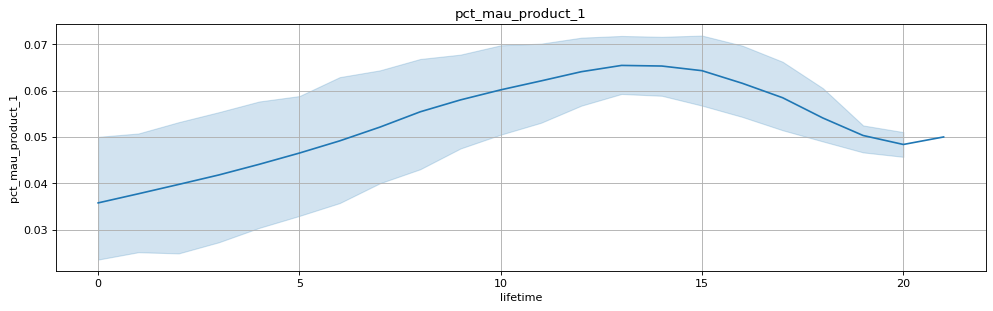

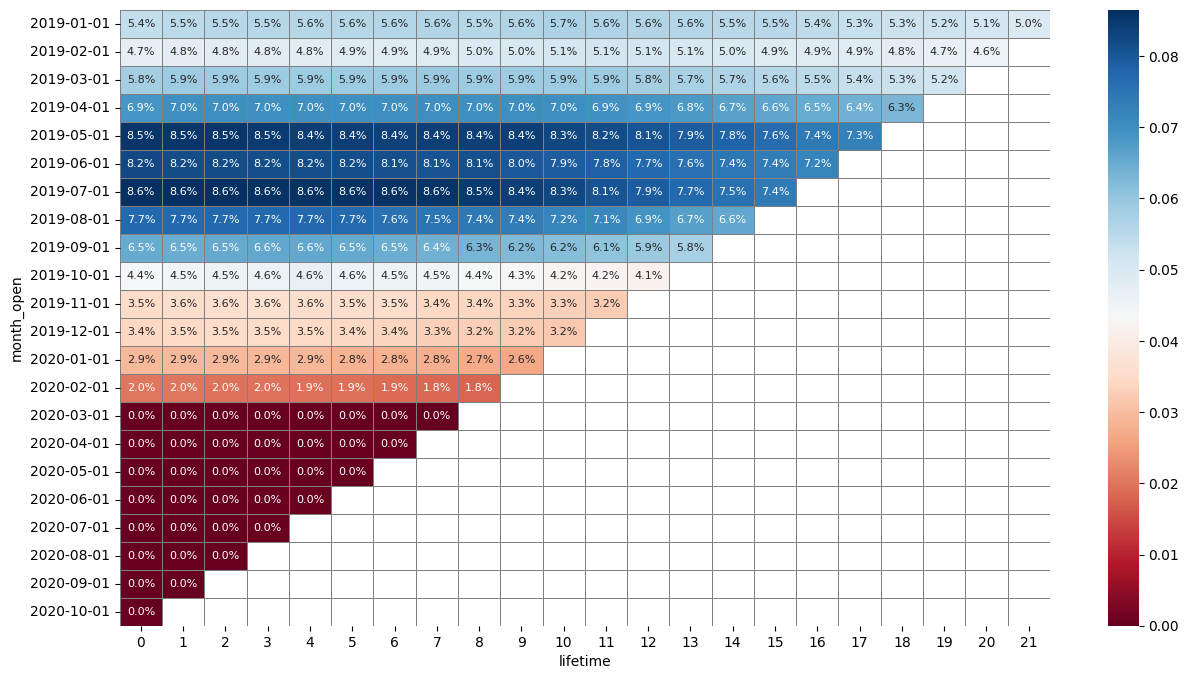

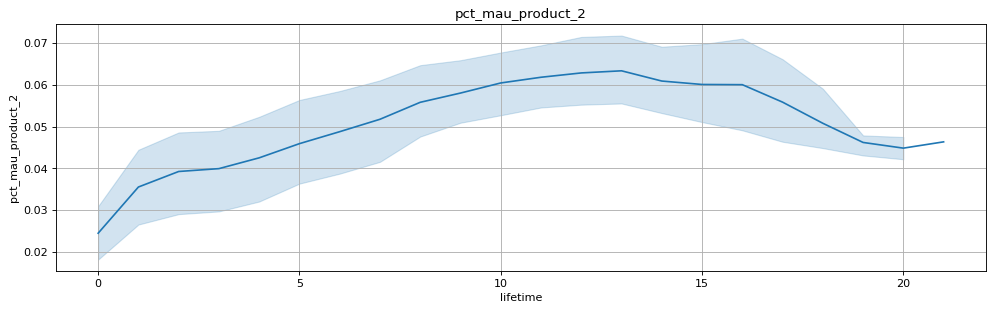

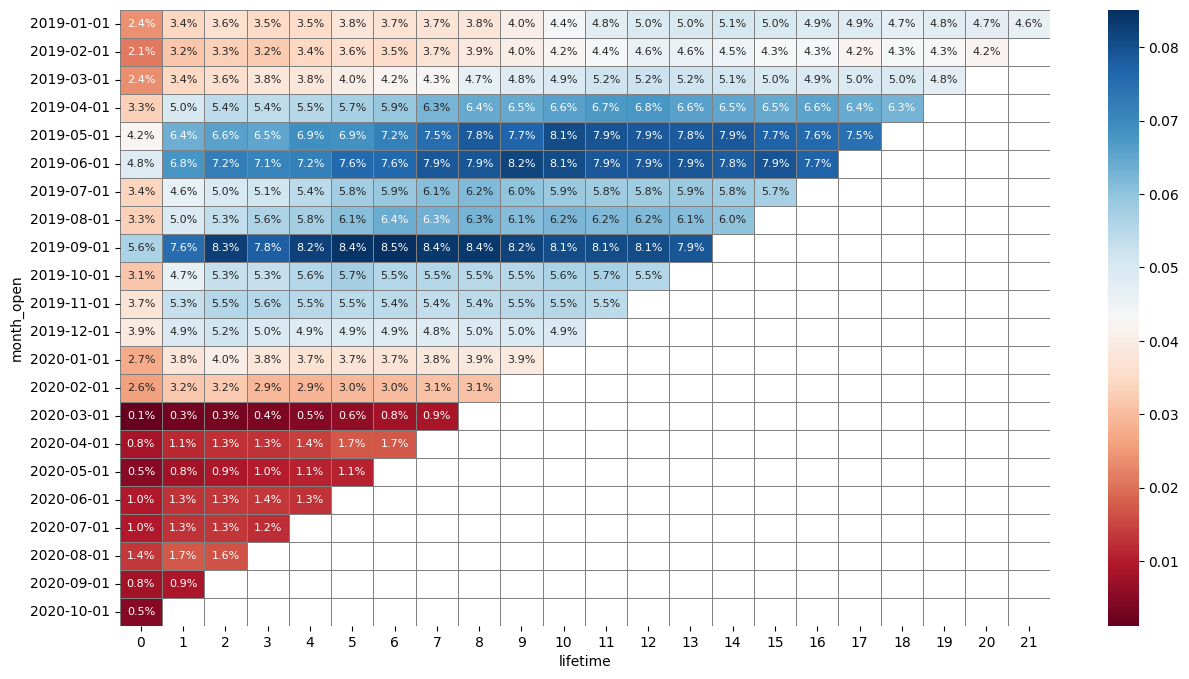

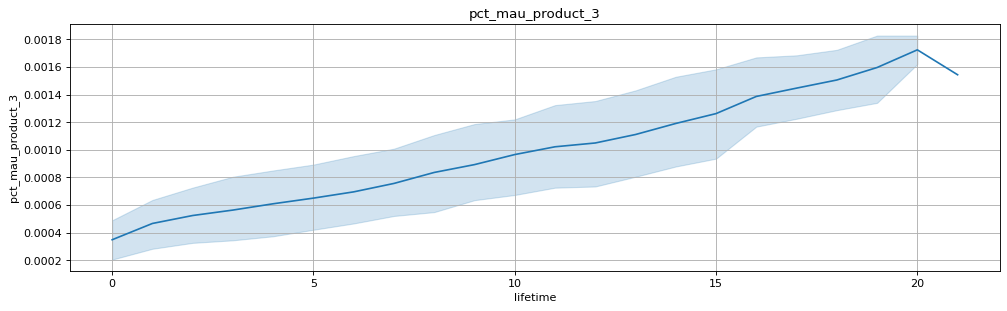

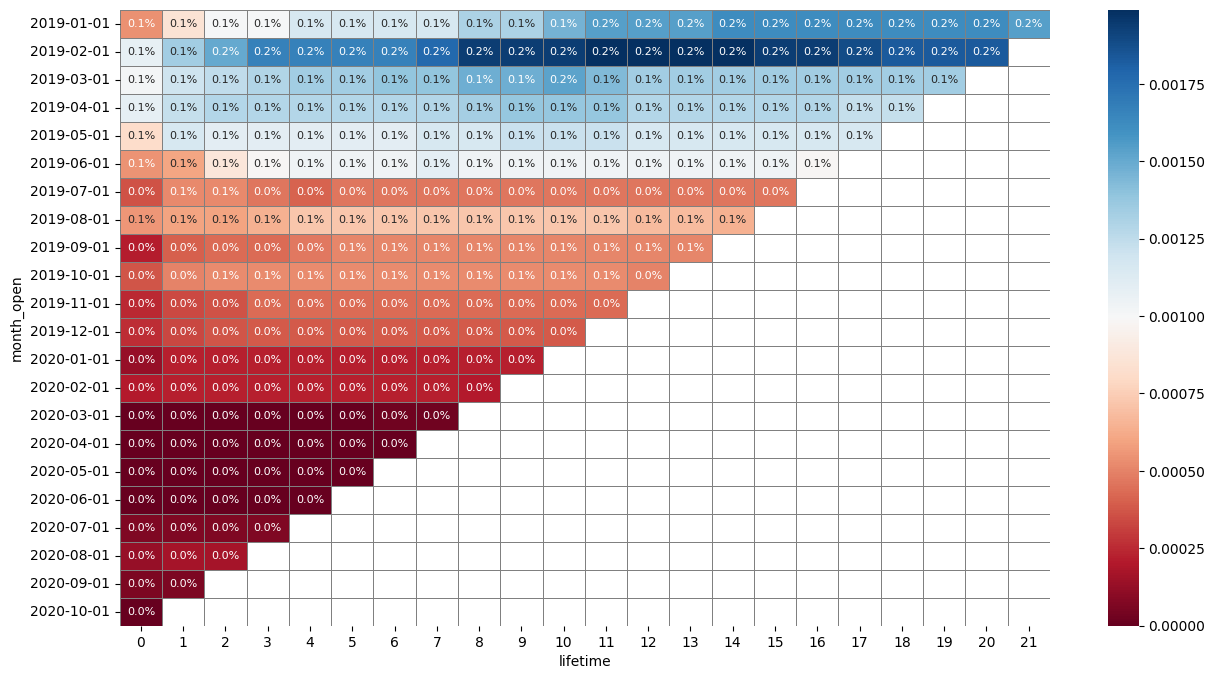

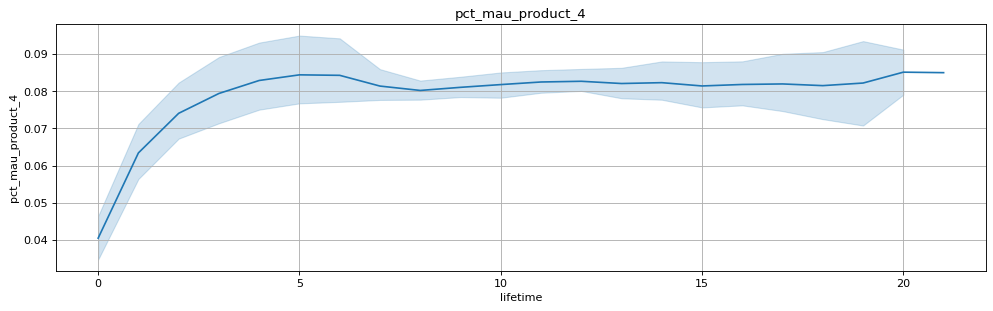

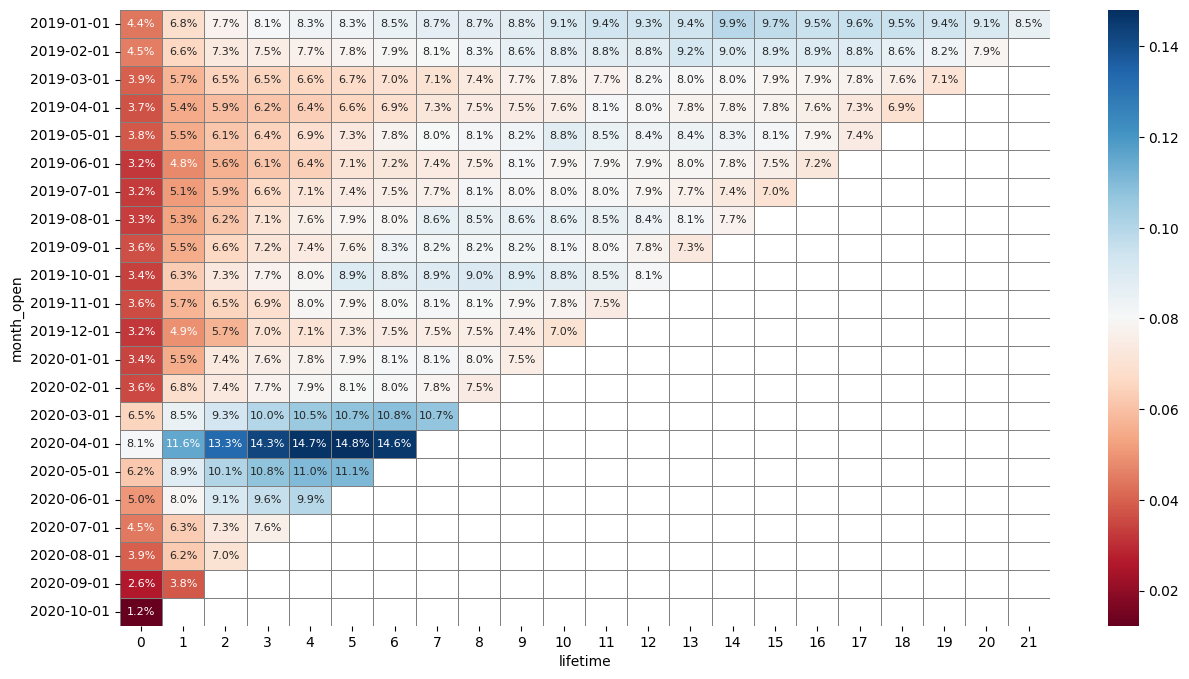

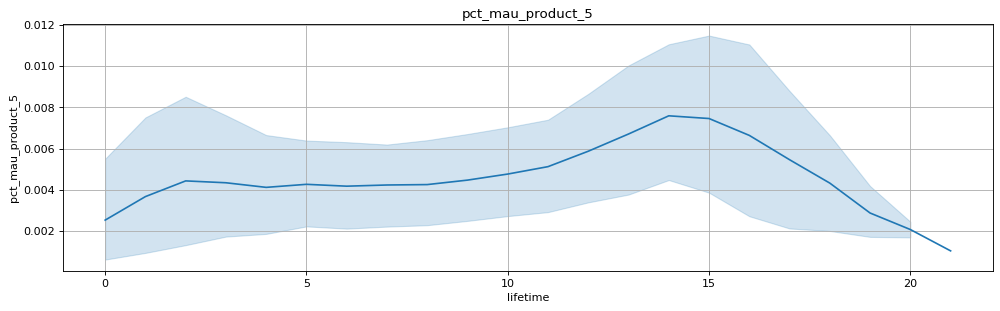

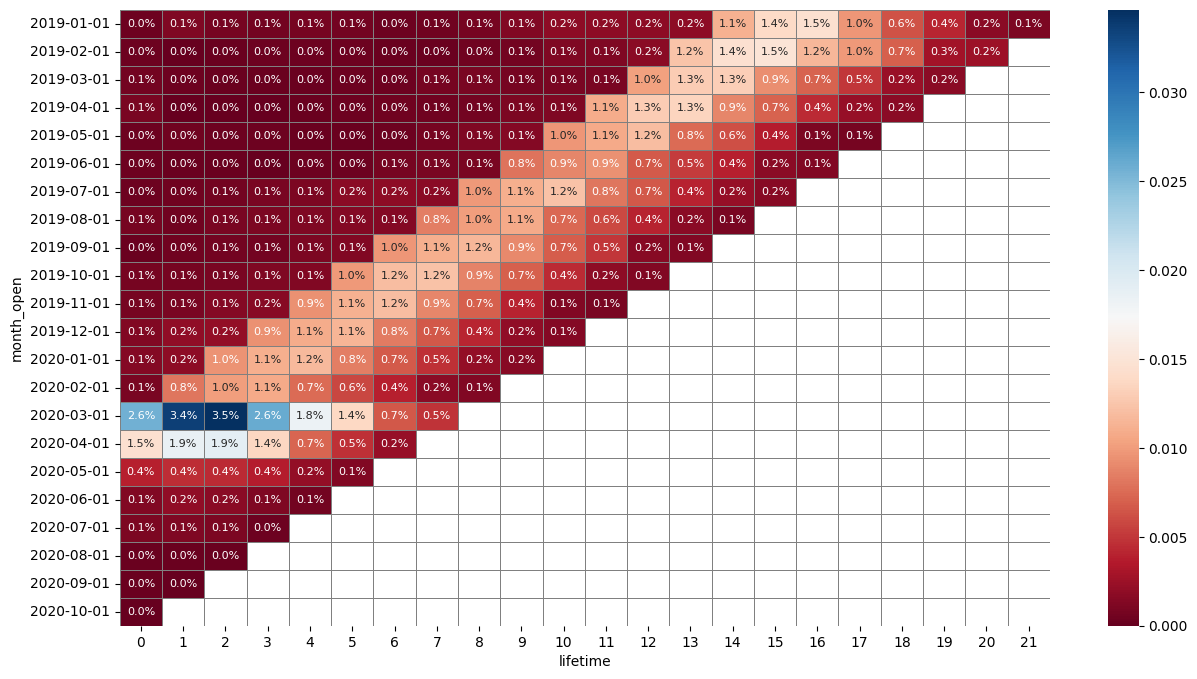

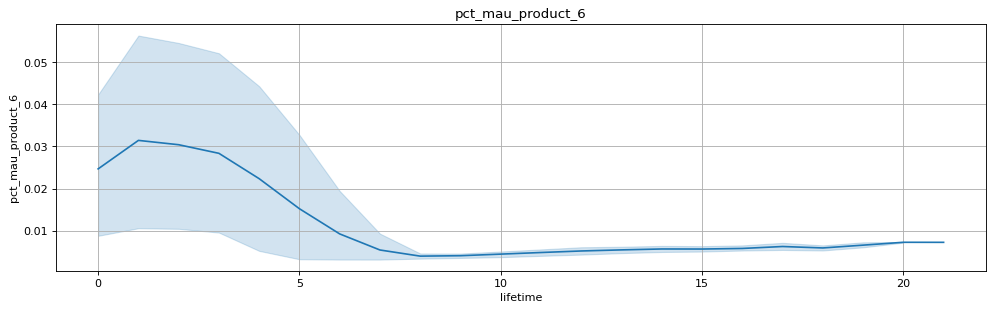

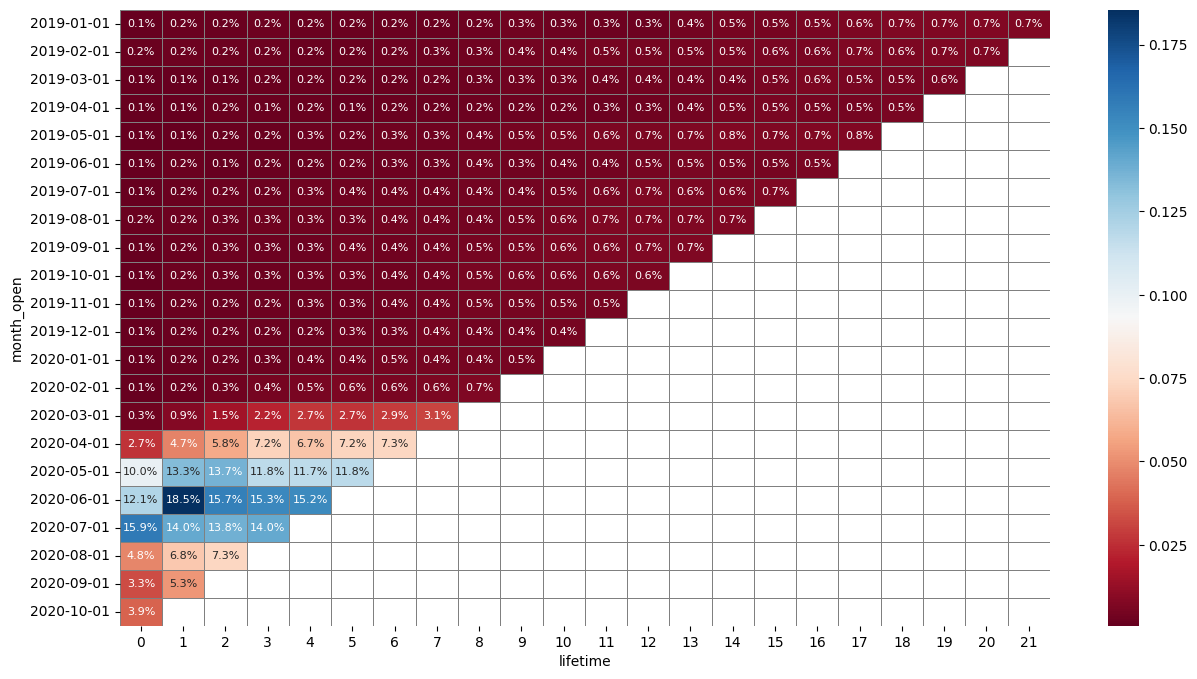

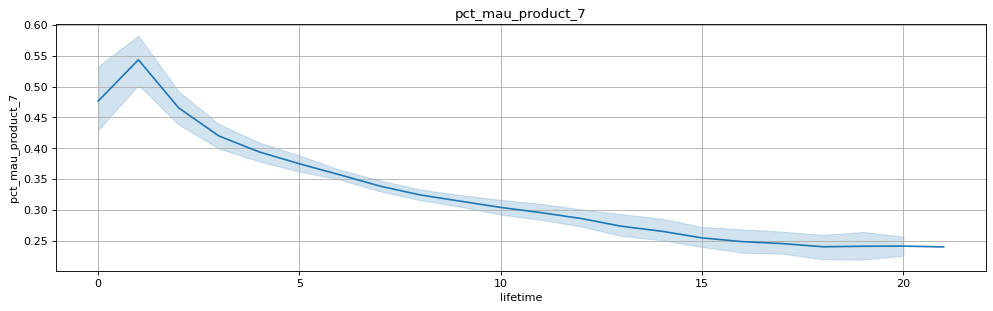

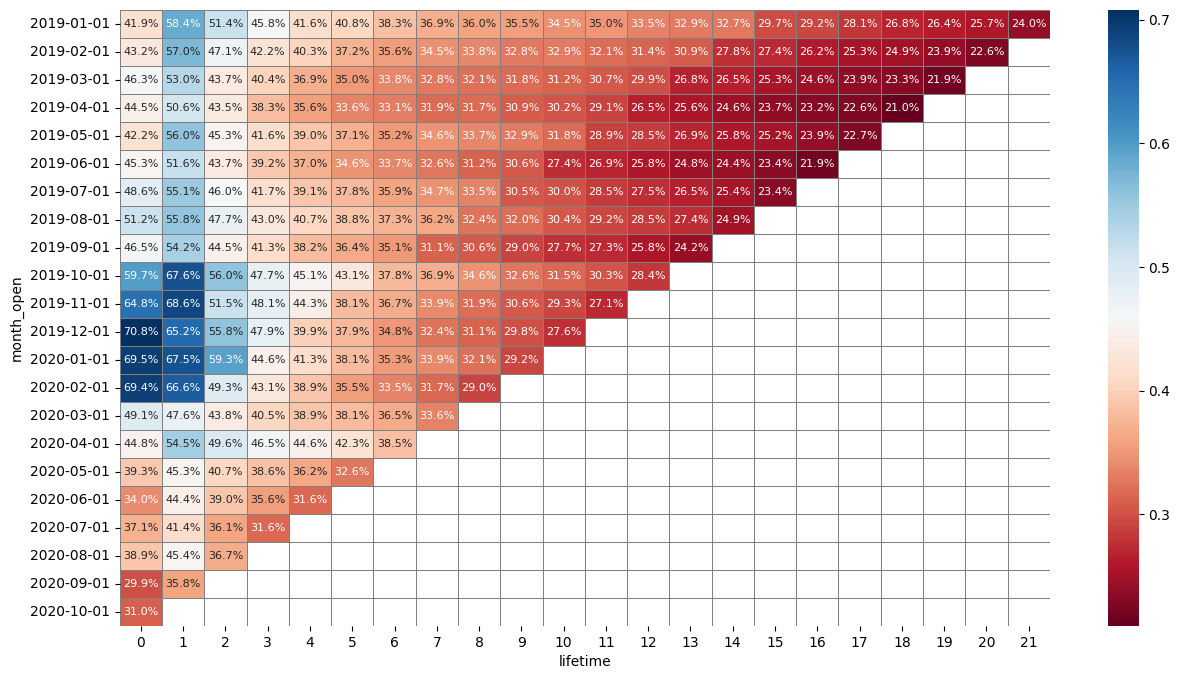

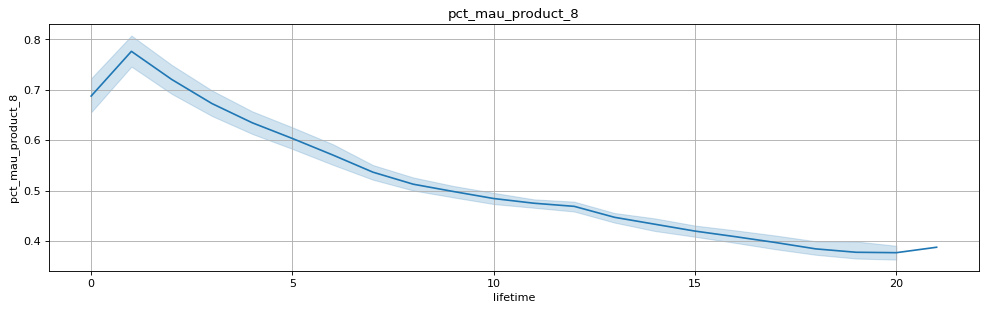

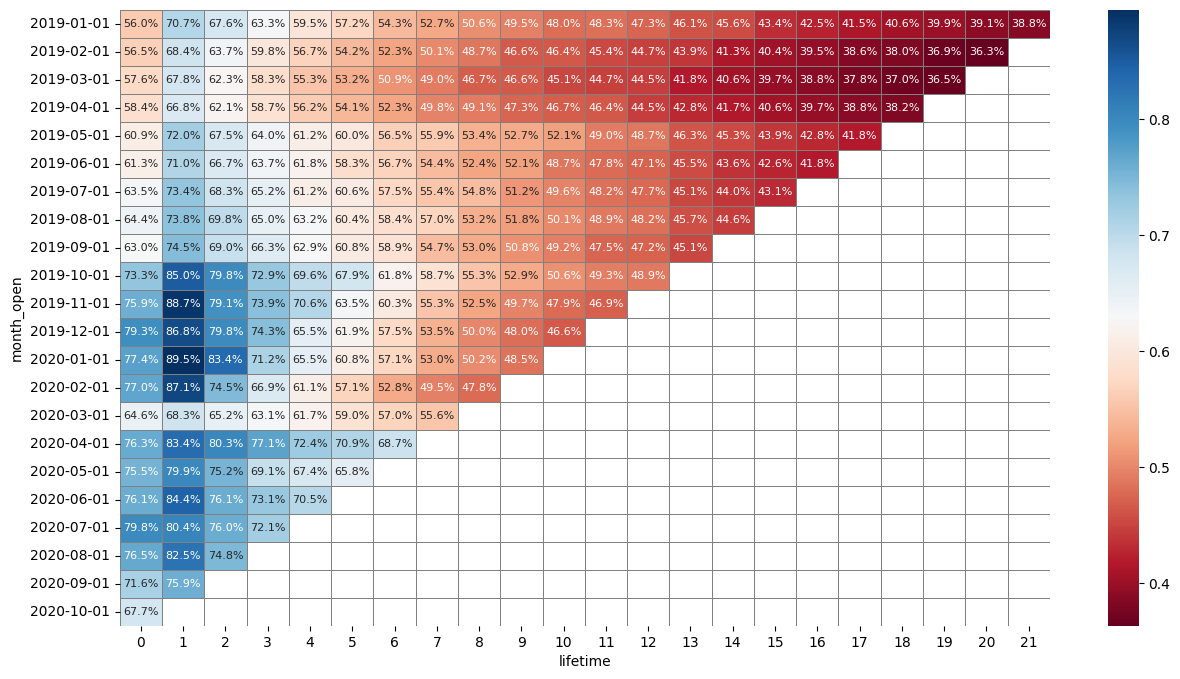

In [24]:
product_mau('channel_2')

### Процент активныз продуктов у пользователей с Канала 2

- Продукт 1 - наблюдается рост в среднем с 3,5% до 5%. У когорт после 01.03.2019 наблюдается значительное падение процента активных продуктов по сравнениб с другими когортами.
- Продукт 2 - наблюдается рост в среднем с 2,5% до 4,5%. У когорт после 01.03.2019 наблюдается значительное падение процента активных продуктов по сравнениб с другими когортами.
- Продукт 3 - наблюдается рост в среднем с 0,1% до 0,16%. У когорт после 01.06.2019 наблюдается значительное падение доли активных продуктов.
- Продукт 4 - наблюдается рост в среднем с 4% до 8%. У когорт 01.03.2020 - 01.06.2020 Наблюдается значитаельный рост активных пользователей по сравнениб с другими когортами. 
- Продукт 5 - не наблюдается ни падение ни рост. У когорт 01-03-2020 и 01-04-2020 наблюдается значительный рост. 
- Продукт 6 - наблюдается падение c 3% до 0,5%. Наблюдается аномально высокий процент активных продуктов у когорт 01-05-2020 - 01-07-2020.
- Продукт 7 - наблюдается падение в среднем с 50% до 25%. Наблюдается анмально высокий процент активных пользователей у когорт 01-10-2019 - 01-02-2020
- Продукт 8 - наблюдается падение в среднем с 70% до 40%


- ### Канал 3

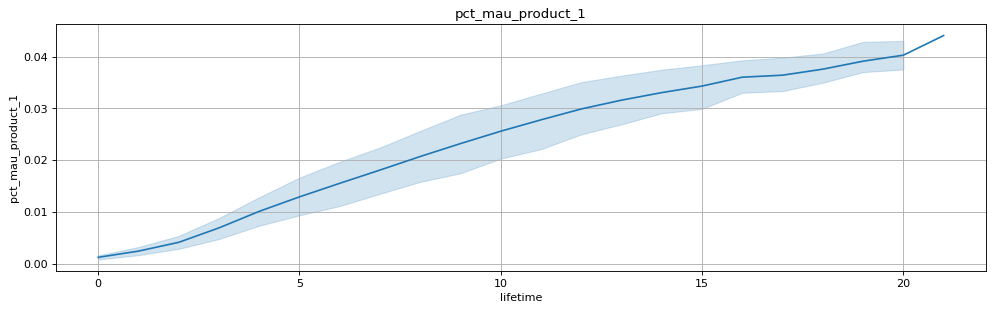

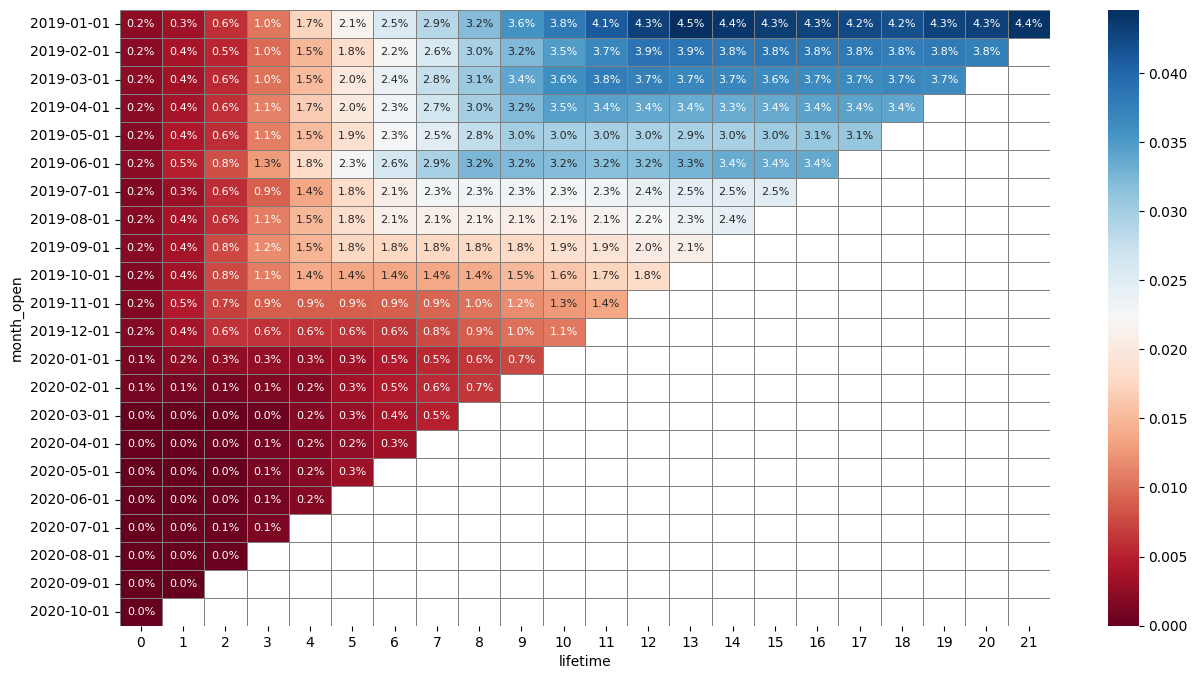

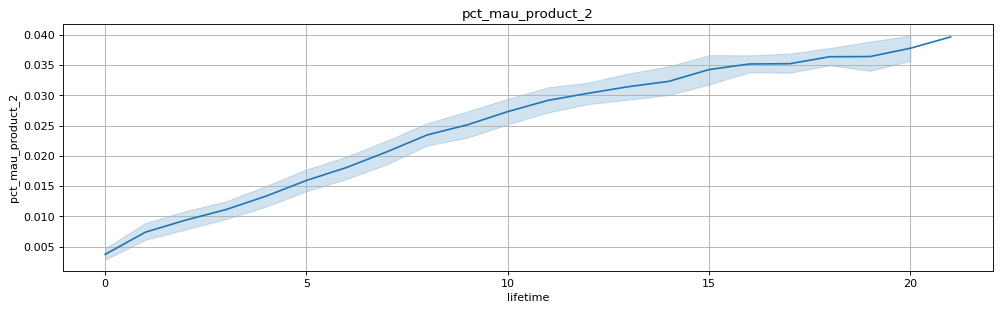

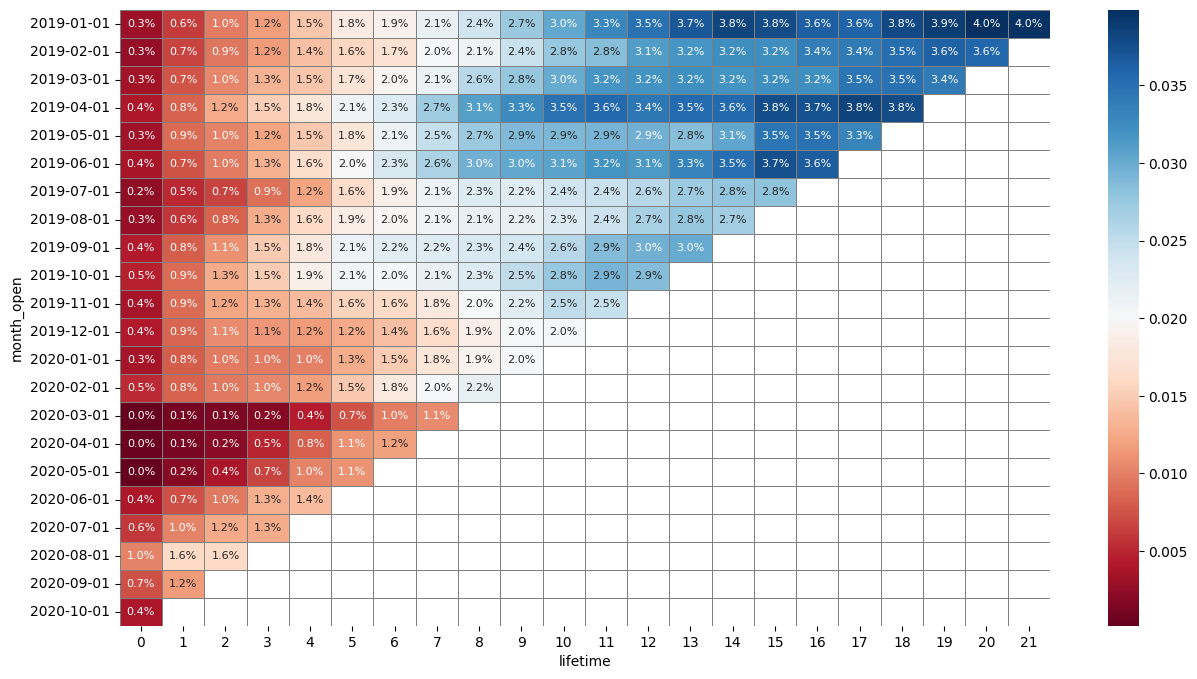

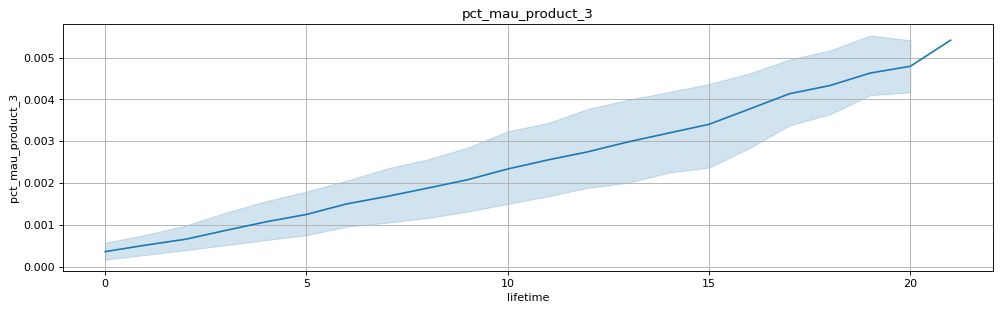

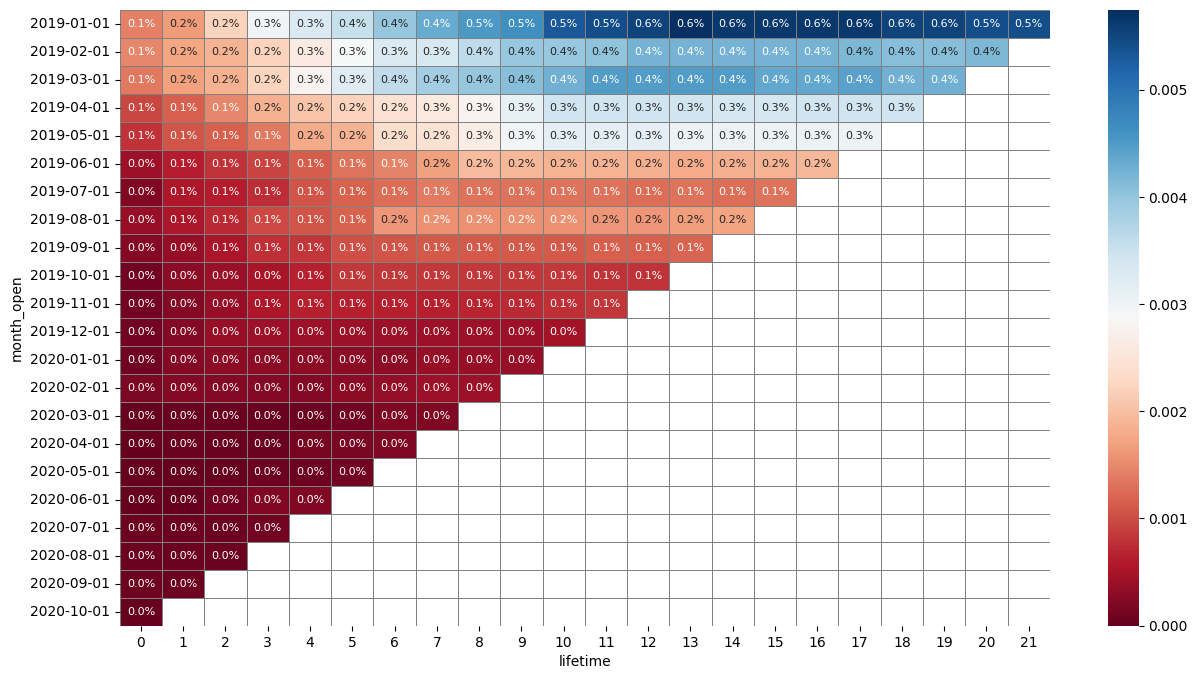

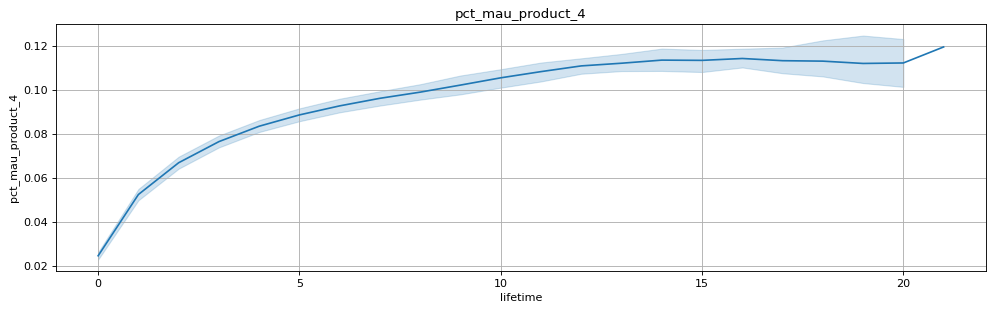

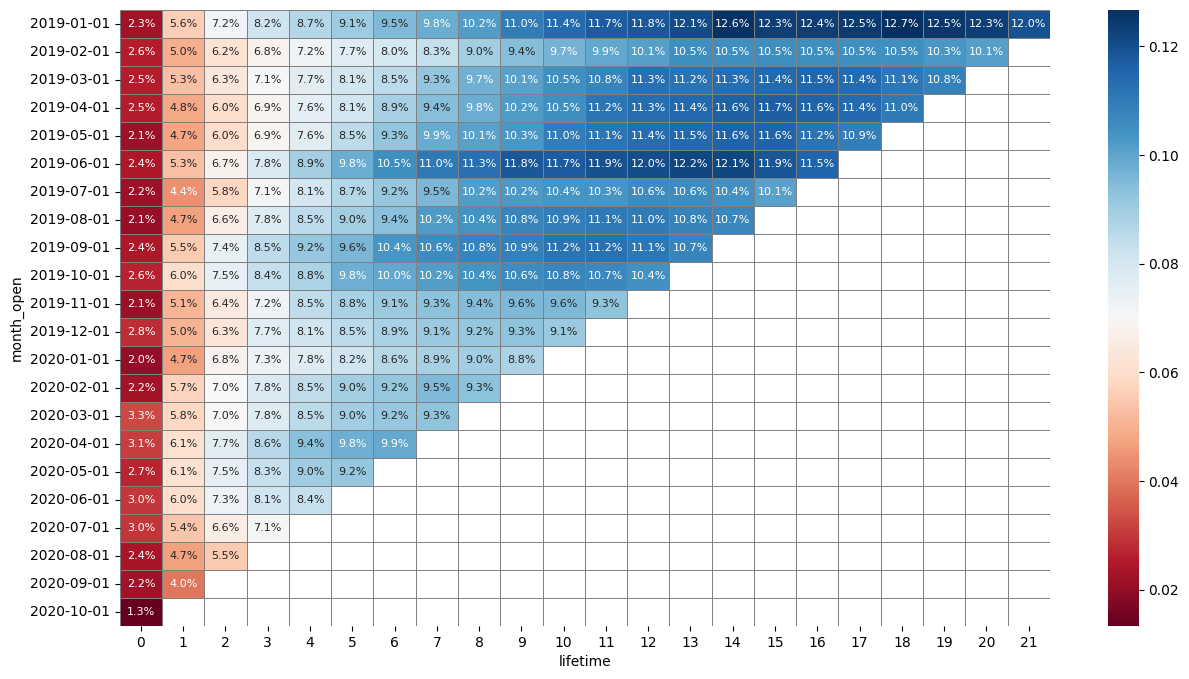

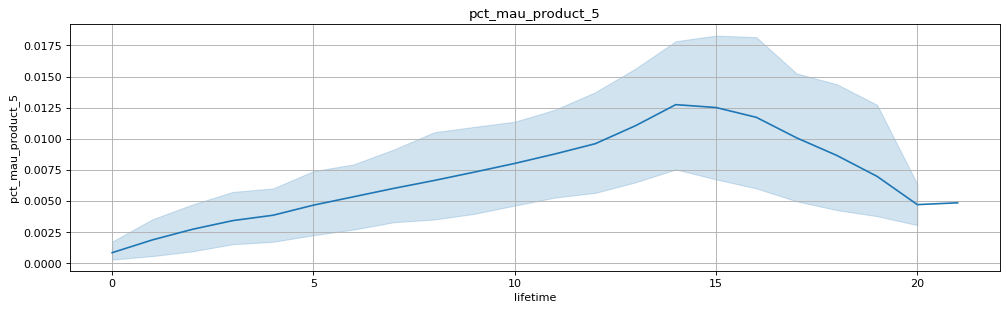

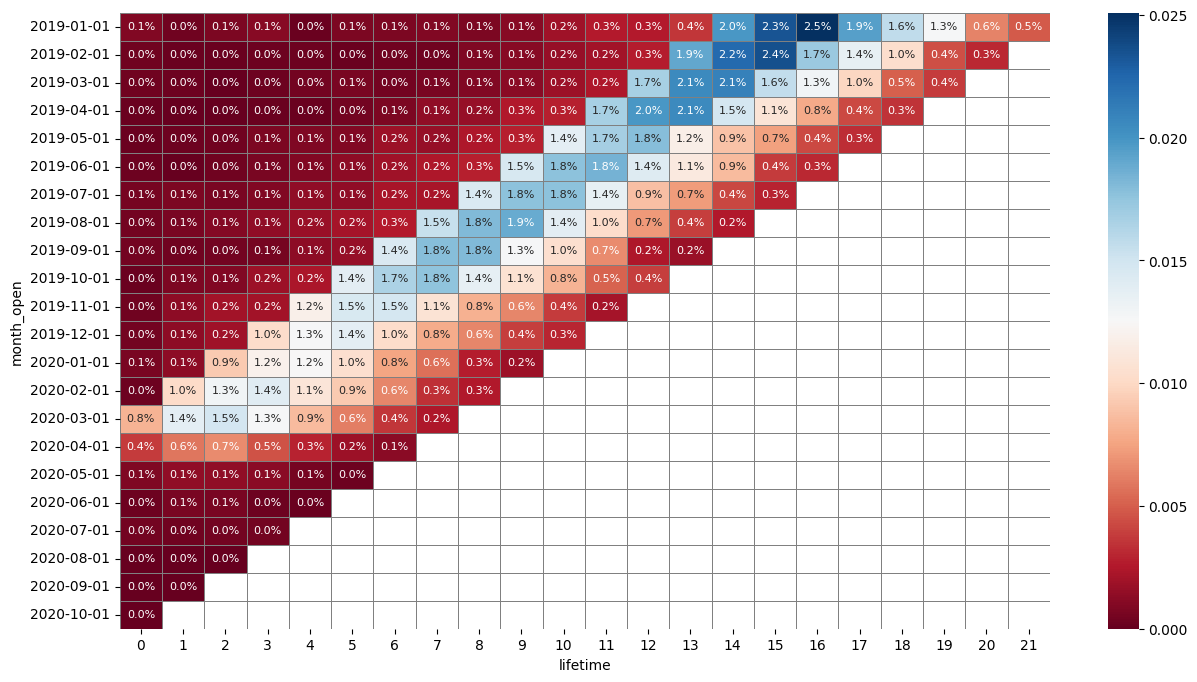

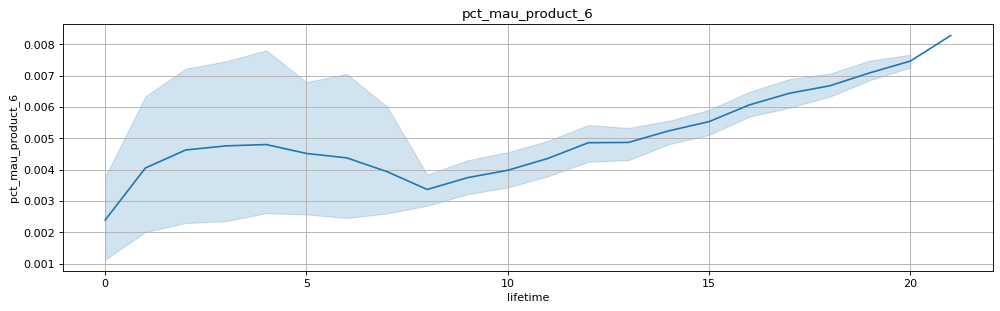

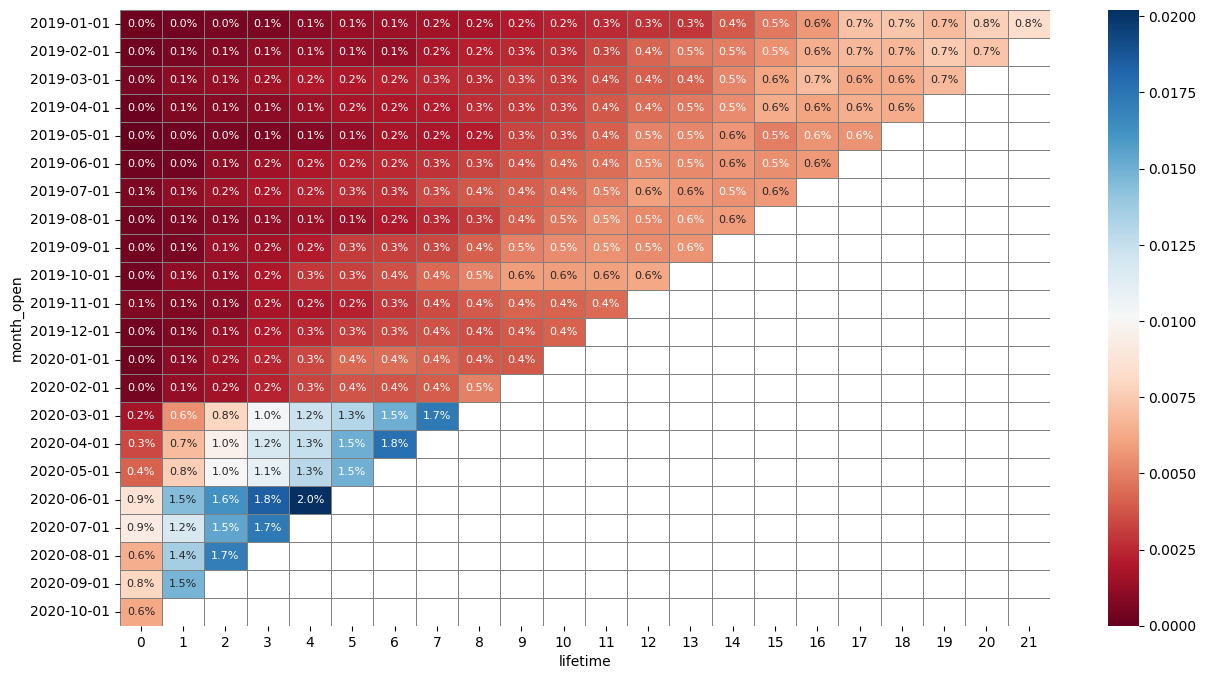

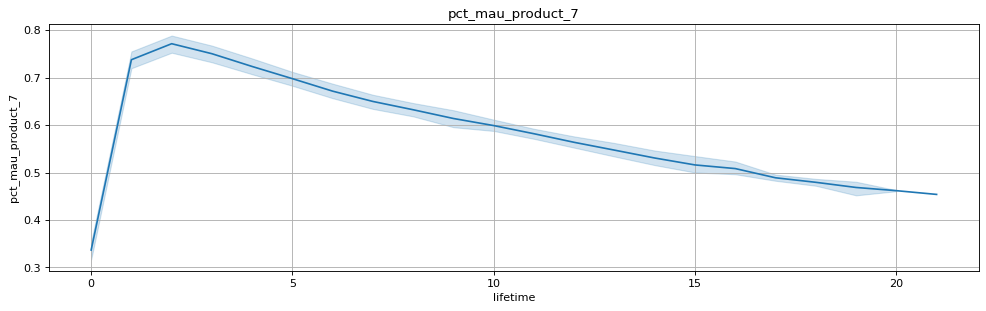

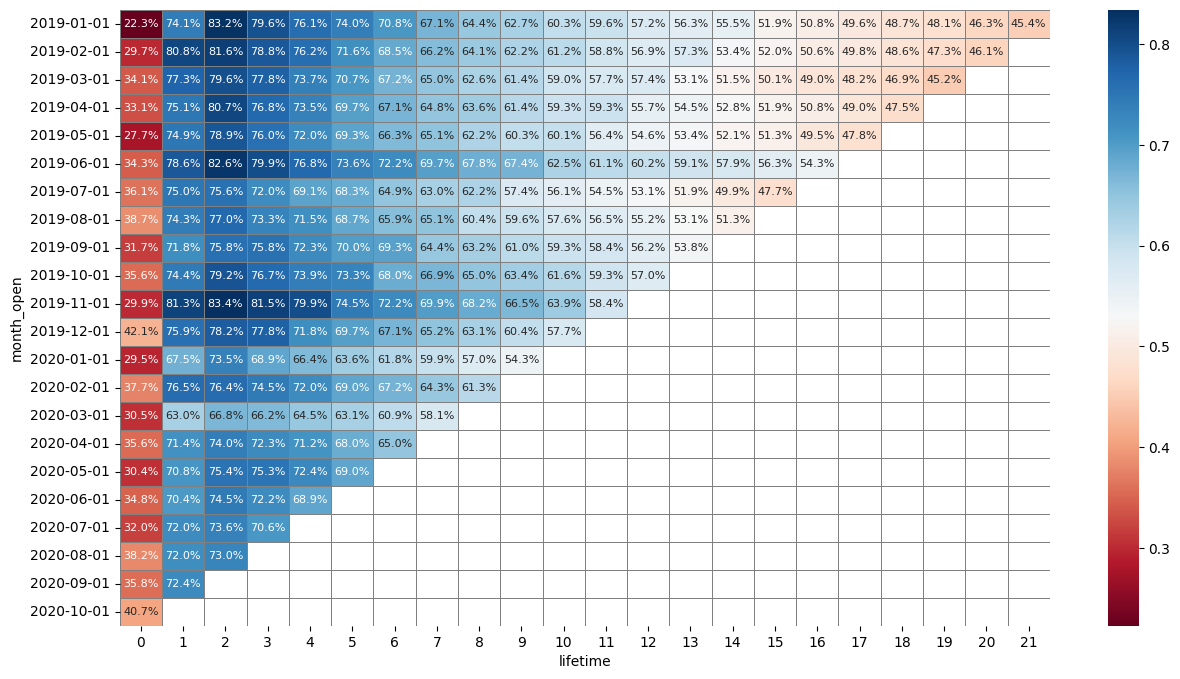

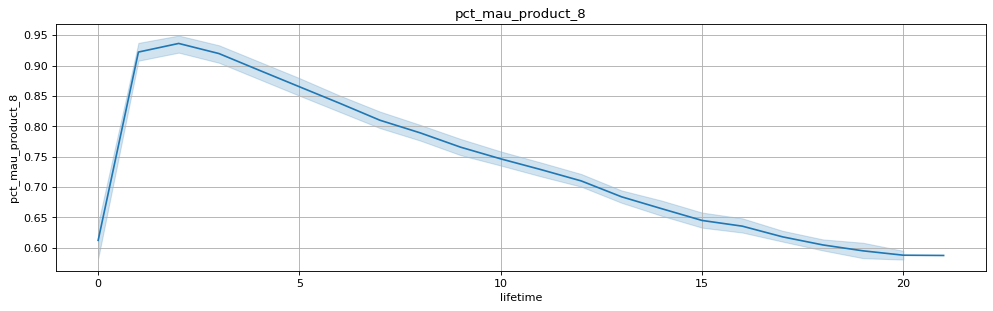

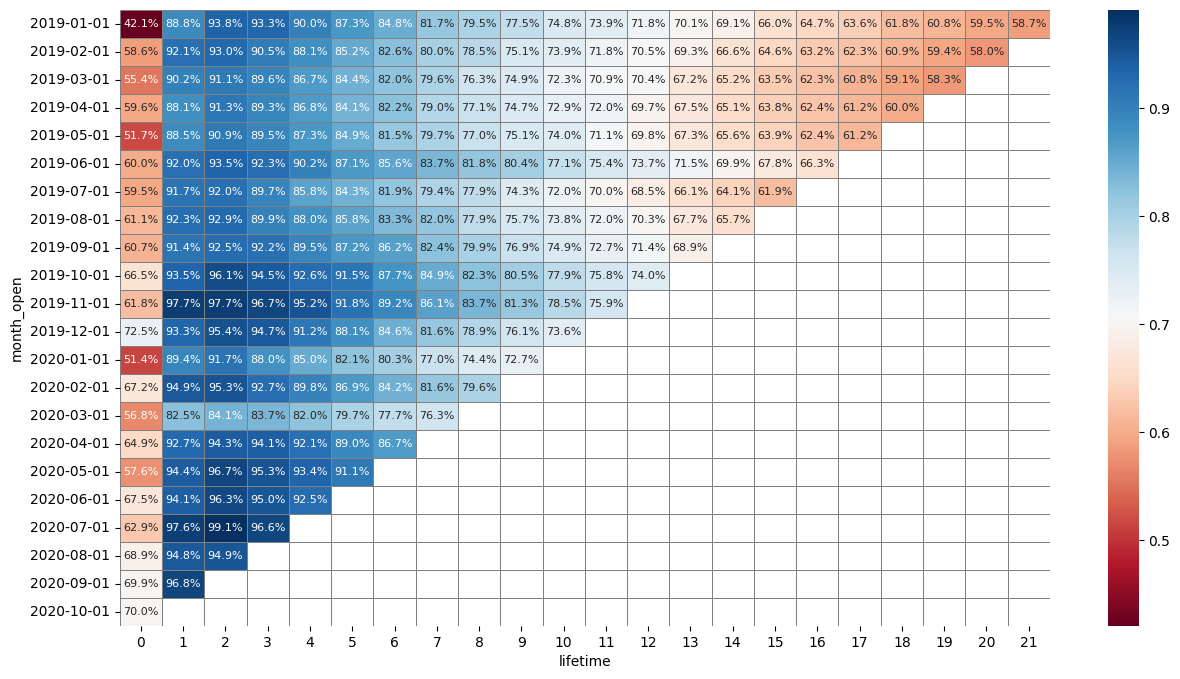

In [25]:
product_mau('channel_3')

### Процент активных продуктов у пользователей с Канала 2

- Продукт 1 - наблюдается рост в среднем с 0,1% до 4%. 
- Продукт 2 - наблюдается рост в среднем с 0,1% до 4%. 
- Продукт 3 - наблюдается рост в среднем с 0,1% до 0.5%. 
- Продукт 4 - наблюдается рост в среднем с 2% до 12%. 
- Продукт 5 - наблюдается рост в среднем с 0,1% до 0,5%. 
- Продукт 6 - наблюдается рост в среднем с 0,1% до 0,8%. 
- Продукт 7 - наблюдается резкий рост в среднем c 30 до 75% и со 2го месяца у всех когорт и плавное падение в среднем до 45% 
- Продукт 8 - наблюдается резкий рост в среднем c 30 до 95% и со 2го месяца у всех когорт и плавное падение в среднем до 60% 


# Общий вывод

1. 3 канал: самый эффективный по 6 продуктам с него наблюдается рост. 
2. Самый неэффективный - 2 канал. с него наименшая доля активных продуктов и клиентов по всем каналам. 
3. У продуктов 7 и 8 несмотря на самые высокие доли активных клиентов, наблюдается падение независимо от канала трафика
4. У когорт в период с 01-03-2020 до 01-07-2020 наблюдается аномальный рост по продуктам 1, 2, 3 и 4. Возможно менялись условия или настройки рекламный кампаний. 